## Rainfall Weather Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


## Predicting RainFall Tomorrow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data Set

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3108,2016-08-01,Williamtown,7.0,19.0,0.0,10.6,NaN,WNW,19.0,NW,...,54.0,50.0,1018.2,1013.6,5.0,7.0,15.1,18.5,No,No
5086,2011-05-24,Melbourne,9.8,16.6,1.2,0.2,3.2,S,50.0,SW,...,73.0,54.0,1010.2,1012.5,7.0,5.0,13.2,14.6,Yes,Yes
5287,2011-12-11,Melbourne,14.8,20.5,NaN,4.8,4.1,SSE,43.0,SW,...,75.0,55.0,1008.0,1007.5,NaN,NaN,15.7,18.6,NaN,Yes
393,2009-12-29,Albury,18.7,35.9,0.0,NaN,NaN,SSE,31.0,ENE,...,46.0,24.0,1020.0,1017.0,NaN,NaN,25.6,34.1,No,No
6484,2012-01-20,Brisbane,20.6,30.3,0.0,10.0,8.8,SE,35.0,SSE,...,64.0,61.0,1013.7,1011.9,7.0,4.0,26.7,27.5,No,No
2974,2016-03-20,Williamtown,13.2,24.1,NaN,NaN,NaN,SSW,39.0,W,...,77.0,57.0,1016.9,1015.4,8.0,6.0,19.1,23.0,NaN,Yes
152,2009-05-02,Albury,7.2,19.2,0.0,NaN,NaN,SW,22.0,ENE,...,81.0,49.0,1026.9,1024.0,8.0,4.0,10.1,19.1,No,No
3035,2016-05-20,Williamtown,13.0,23.0,0.0,7.0,NaN,WNW,46.0,WNW,...,47.0,52.0,1020.9,1019.5,NaN,NaN,17.9,20.7,No,No
3280,2017-01-20,Williamtown,20.1,29.9,0.2,NaN,NaN,SSW,56.0,N,...,67.0,88.0,1002.5,997.0,4.0,3.0,24.3,25.9,No,Yes
1213,2010-01-10,CoffsHarbour,18.7,29.0,0.0,7.0,13.6,NE,37.0,NNE,...,67.0,62.0,1016.3,1014.2,1.0,1.0,26.2,28.1,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Observations:
    
1) There are total 23 columns in the set which means there are total 22 different attributes and one target variable ofr each case.

2) We need to predict two things from this set. 1) RainTomorrow 2) Rainfall.

3) RainTomorrow is a Classification problem statement while the Rainfall where we need no predict the amount of rainfall is Regression problem statement.

4) There are total 8425 rows in the sets which means there are 8425 instances of our attributes.

5) It is also observed that there are many null values in the data set which have to be worked upon.

6) Two types of data are there in set 1) Float (16 columns) 2) Object (7 columns).

7) Column date is just for information on which date the data was taken, it will not be effecting any of the predictions directly hence we will be droping the column in further stages.

In [8]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%Y/%m/%d").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.year

In [9]:
df1 = df.drop('Date', axis = 1)

In [10]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [11]:
df1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [12]:
df1.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

Here we can see that most of the columns are having null values in them, we will fill those null values through fillna() method. The numerical columns will be filled by the mean and the object columns will be filled by mode.

In [13]:
df1.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

In [14]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,8.000000,3.000000,2010.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,16.000000,6.000000,2011.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


Observations:
    
1) Count of columns can be seen different which means the NaN values are to be filled.

2) Std deviation for most of the columns seems a bit higher which suggest the outliers in the columns.

3) The difference  between the mean and median of the most columns in not much which suggests the less skewness in data.

4) The difference between the 75% and maximum value of most of the columns is at higher side which suggests the outliers in the columns.

In [15]:
num_col = df1.select_dtypes(['int', 'float'])

In [16]:
cato_col = df1.select_dtypes(['object'])

In [17]:
num_col

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1,12,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2,12,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,3,12,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,4,12,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,21,6,2017
8421,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,22,6,2017
8422,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,23,6,2017
8423,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,24,6,2017


In [18]:
cato_col

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


We have separeted the numerical columns and object columns. We will go ahead and fill the nan values.

In [19]:
for i in num_col.columns:
    num_col[i] = num_col[i].fillna(num_col[i].mean())

In [20]:
num_col.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

In [21]:
for i in cato_col.columns:
    cato_col[i] = cato_col[i].fillna(cato_col[i].mode()[0])

In [22]:
cato_col.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [23]:
num_col

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,1,12,2008
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,2,12,2008
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,3,12,2008
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,4,12,2008
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,21,6,2017
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,22,6,2017
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,23,6,2017
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24,6,2017


In [24]:
cato_col

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


In [25]:
num_col.nunique()

MinTemp          286
MaxTemp          332
Rainfall         251
Evaporation      117
Sunshine         141
WindGustSpeed     53
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      385
Pressure3pm      375
Cloud9am          10
Cloud3pm          10
Temp9am          305
Temp3pm          329
Day               31
Month             12
Year              10
dtype: int64

It can be seen that most of the columns are continous execpt Cloud9am and cloud3pm. We will check them ahead.

In [26]:
num_col['Cloud9am'].value_counts()

4.566622    2421
7.000000    1418
1.000000    1038
8.000000    1015
0.000000     554
6.000000     551
5.000000     414
3.000000     384
2.000000     357
4.000000     273
Name: Cloud9am, dtype: int64

In [27]:
num_col['Cloud3pm'].value_counts()

4.503183    2455
7.000000    1294
1.000000    1077
8.000000     863
6.000000     597
5.000000     522
2.000000     508
3.000000     411
4.000000     351
0.000000     347
Name: Cloud3pm, dtype: int64

It can be seen that these two are categorical columns hence we will be droping them num_col and save separatelyafter which we will import them in main dataframe.

In [28]:
num_col

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,1,12,2008
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,2,12,2008
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,3,12,2008
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,4,12,2008
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,21,6,2017
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,22,6,2017
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,23,6,2017
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24,6,2017


We have dropped the categorical columns from our numerical columns now we will check for skewness and outliers in them. 

In [29]:
num_col.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
Day               0.004260
Month             0.039388
Year              0.418663
dtype: float64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


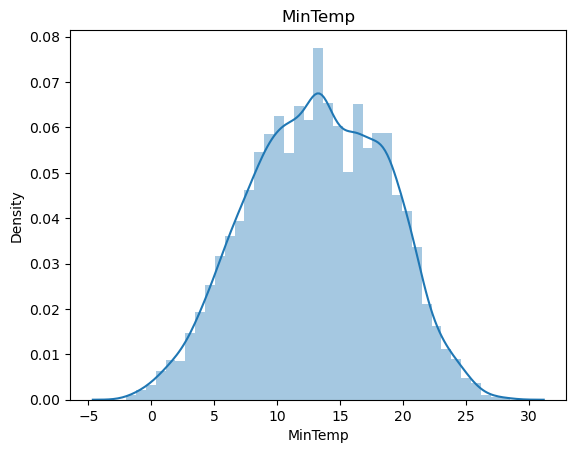

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


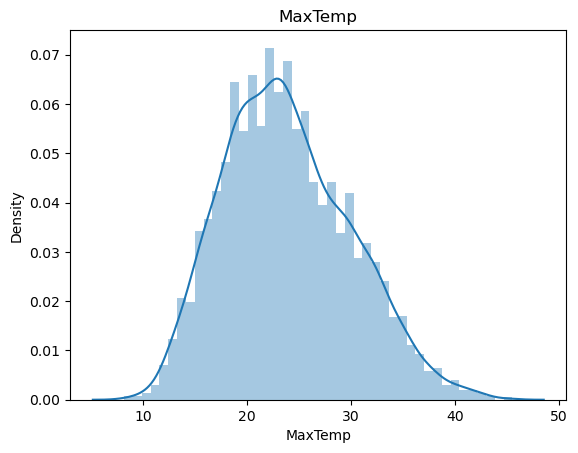

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


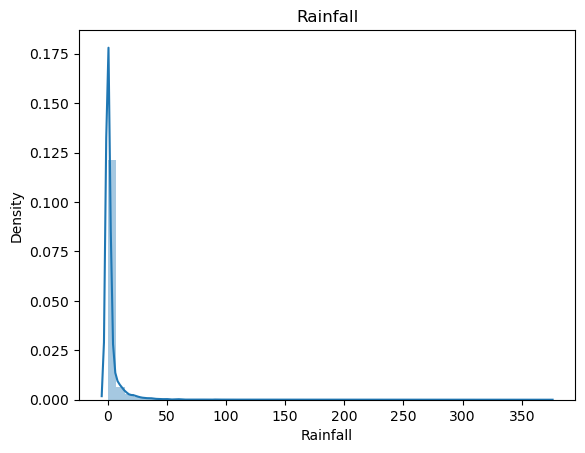

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


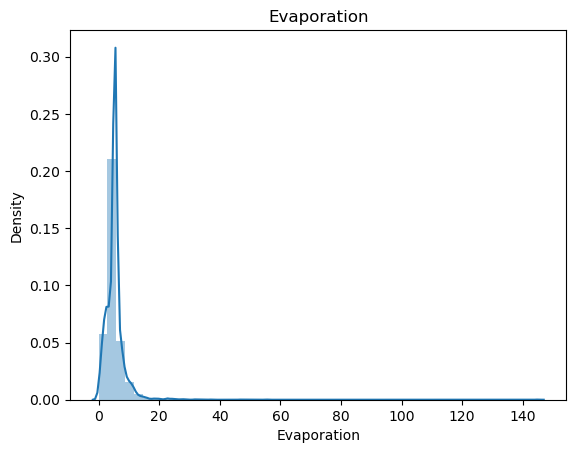

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


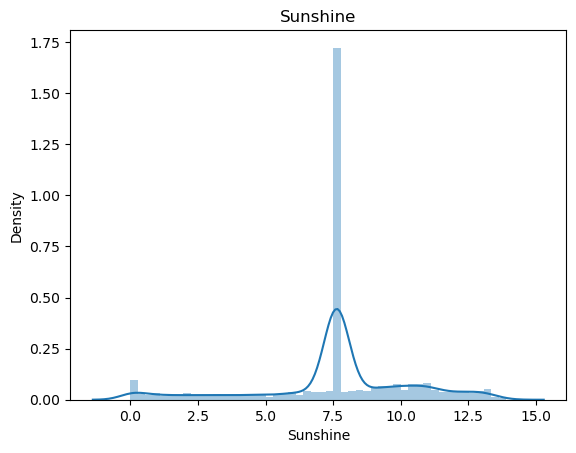

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


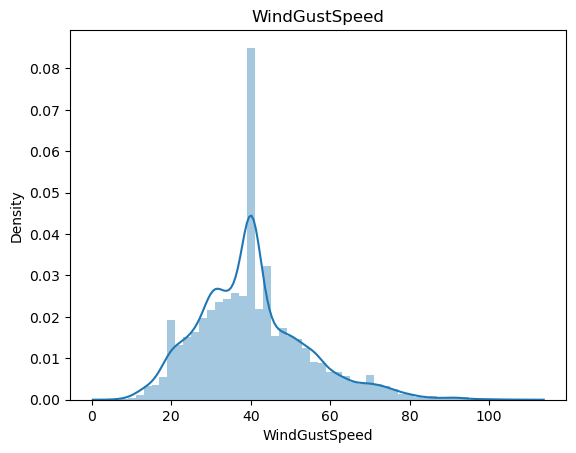

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


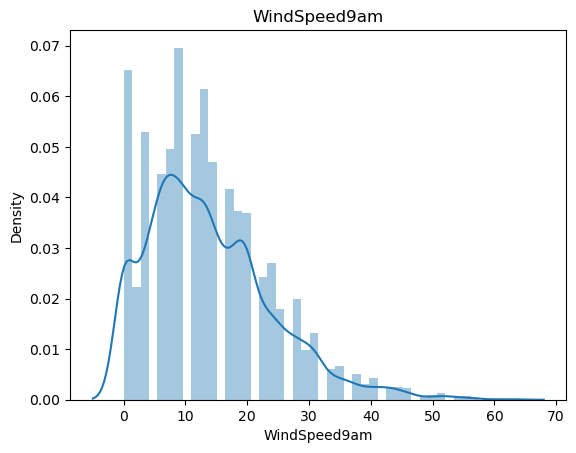

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


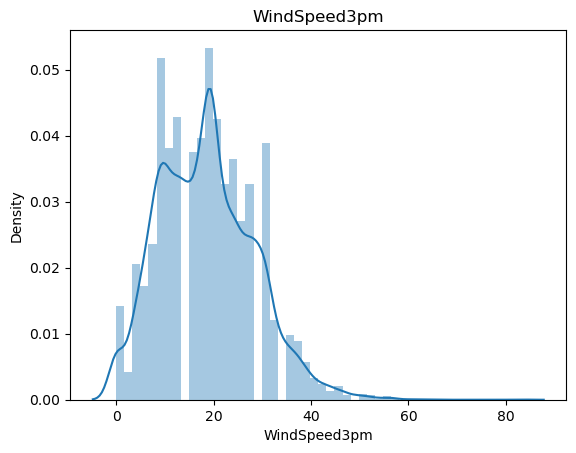

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


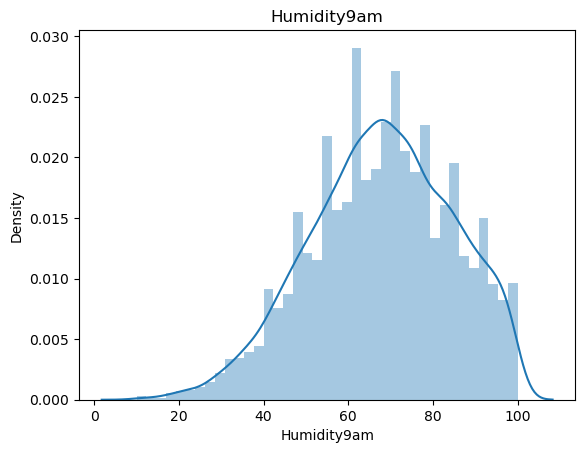

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


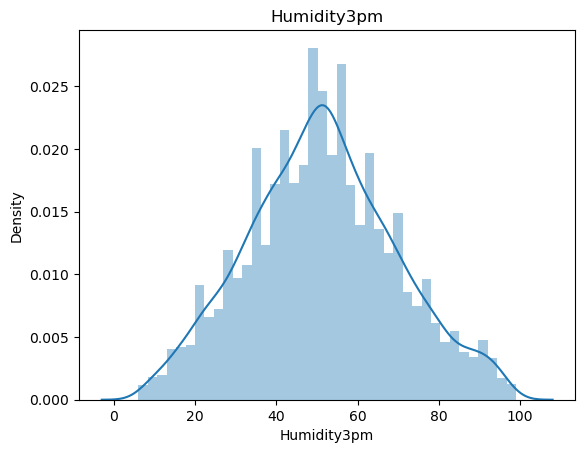

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


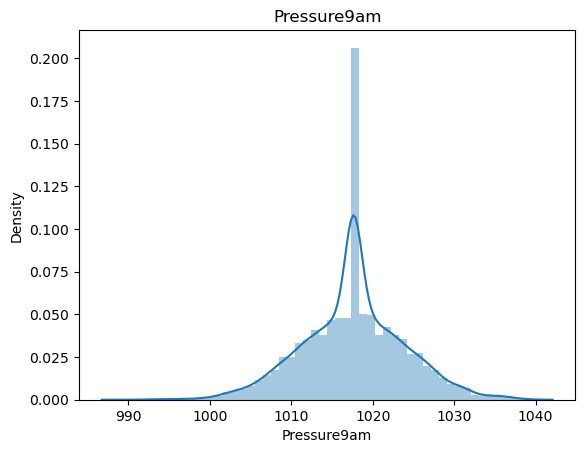

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


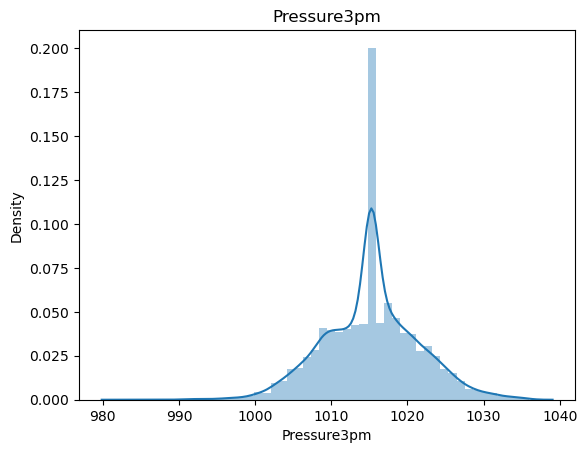

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


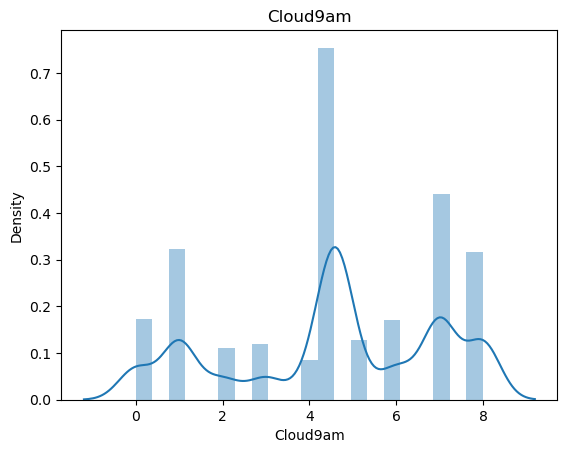

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


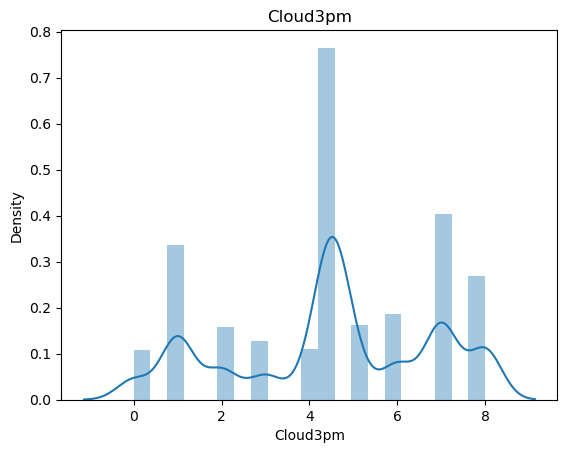

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


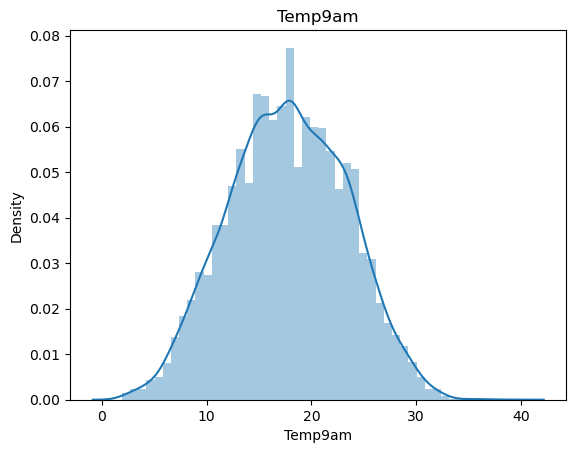

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


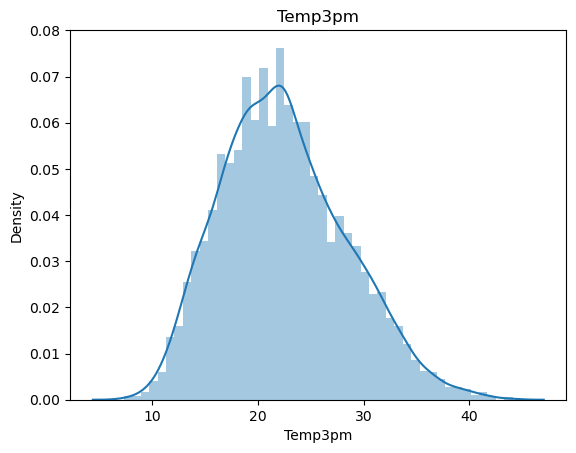

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


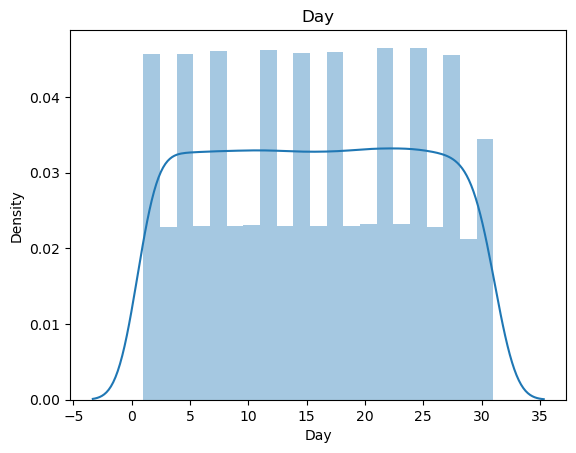

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


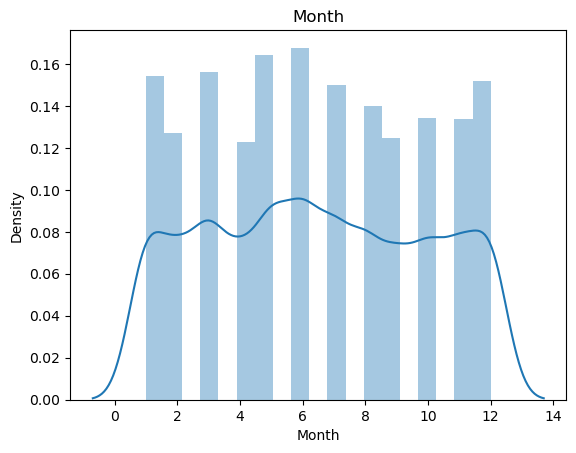

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


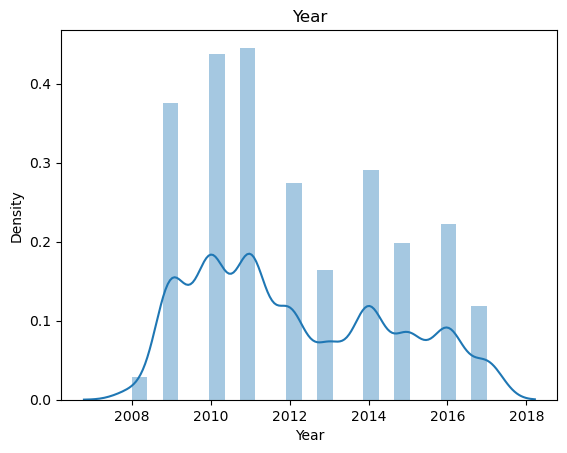

In [30]:
for i in num_col.columns:
    sns.distplot(num_col[i])
    plt.title(i)
    plt.show()

A skewness can be seen in the Rainfall & Evaporation columns. We are not removing them currently as Rainfall column is one of our target variable and it seems Evaporation is a bit categorical hence we will tranform the needed columns through power tranformer in later stage.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


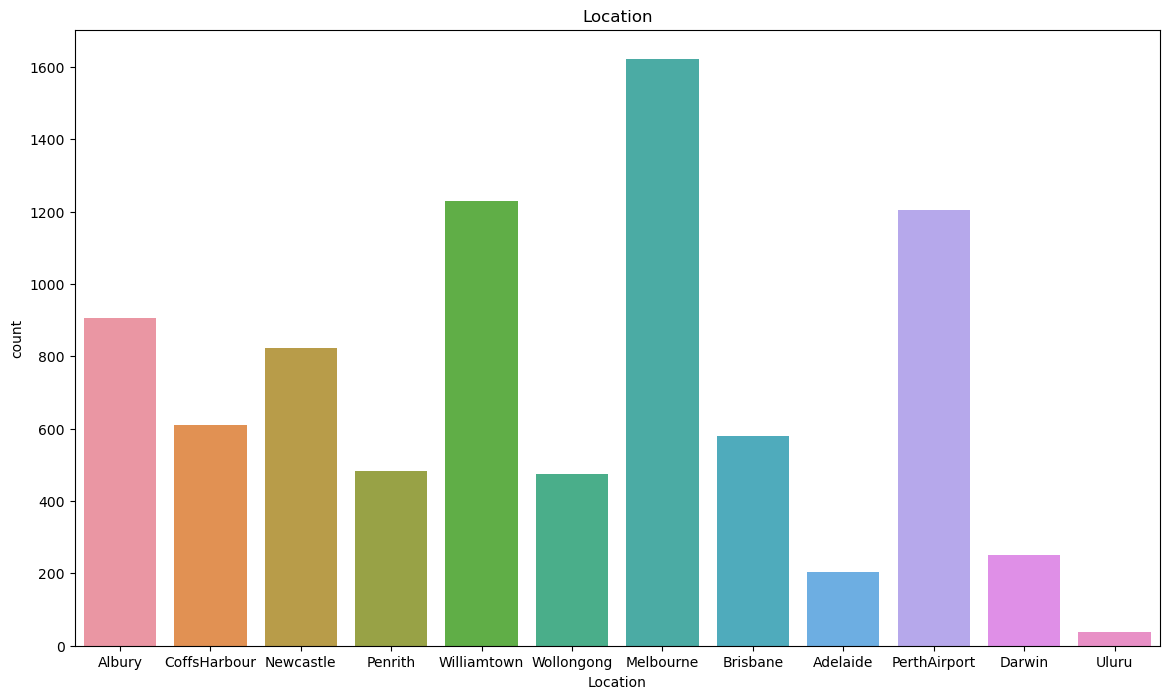

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


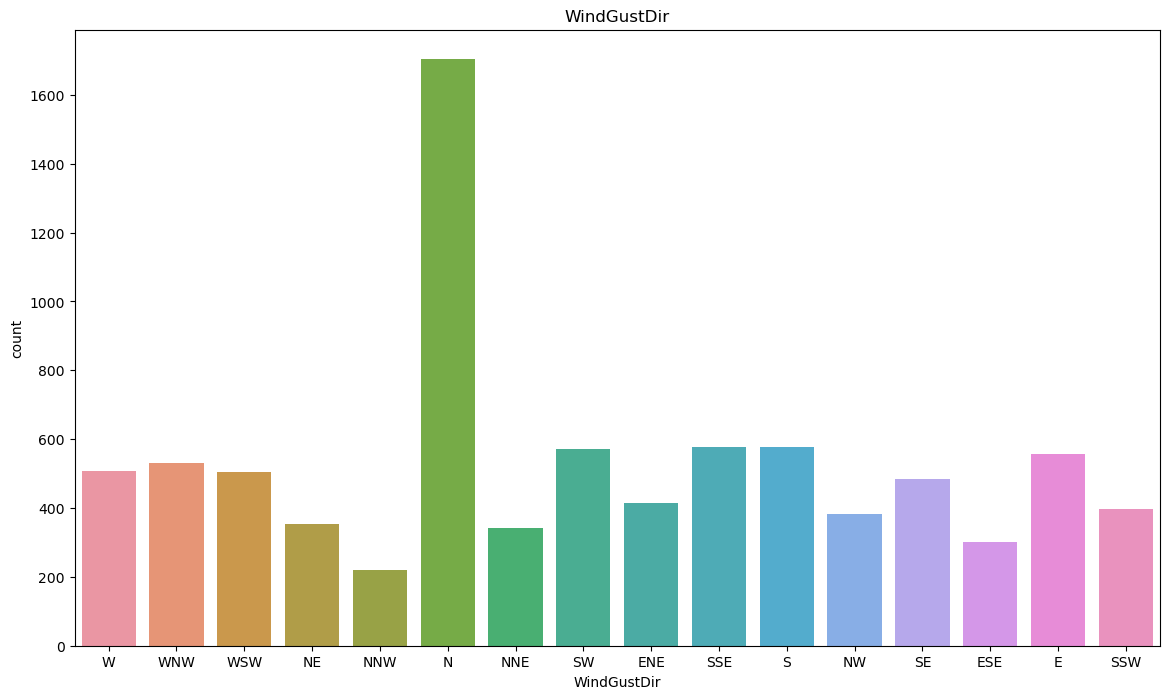

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


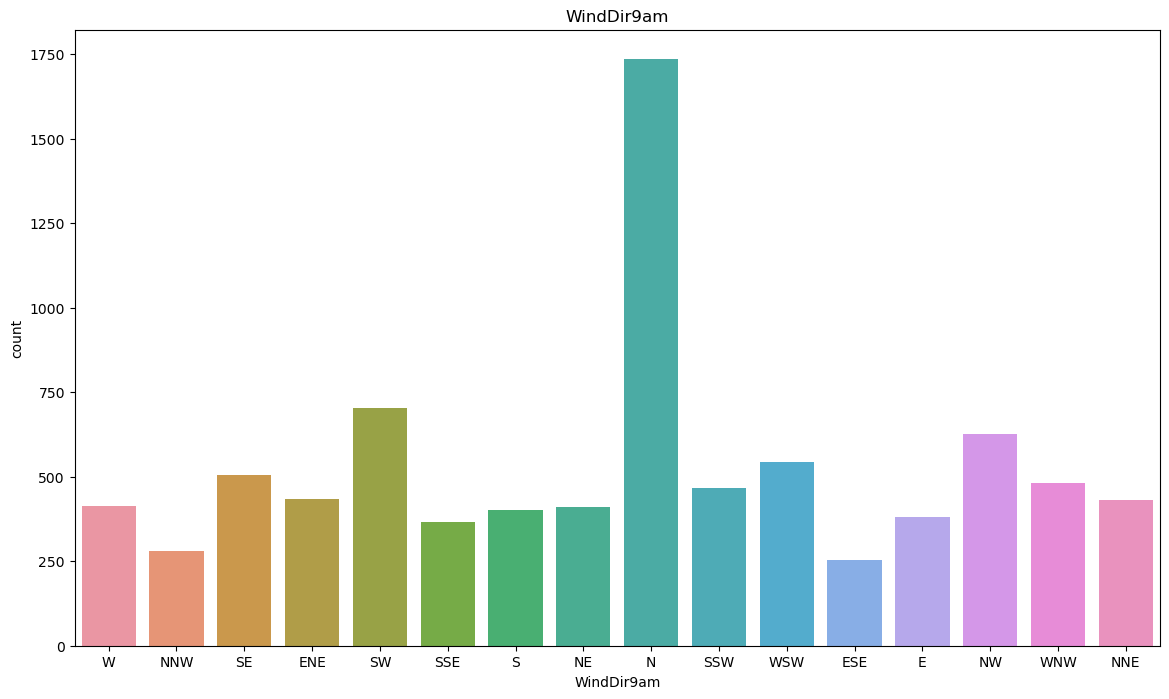

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


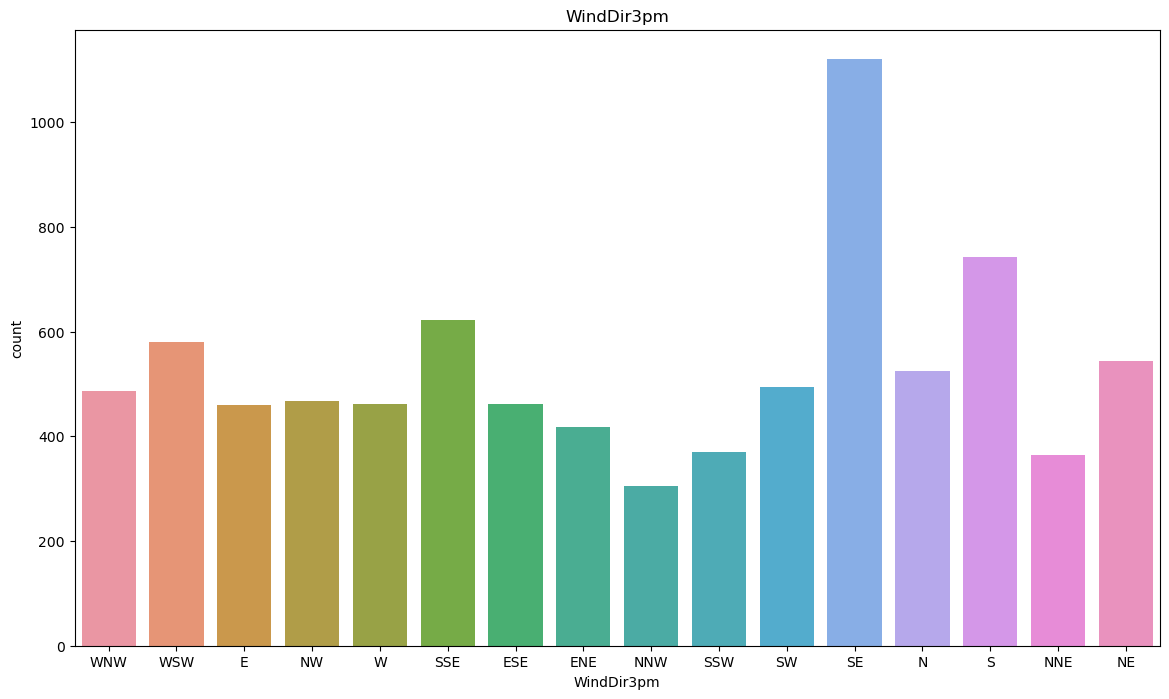

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


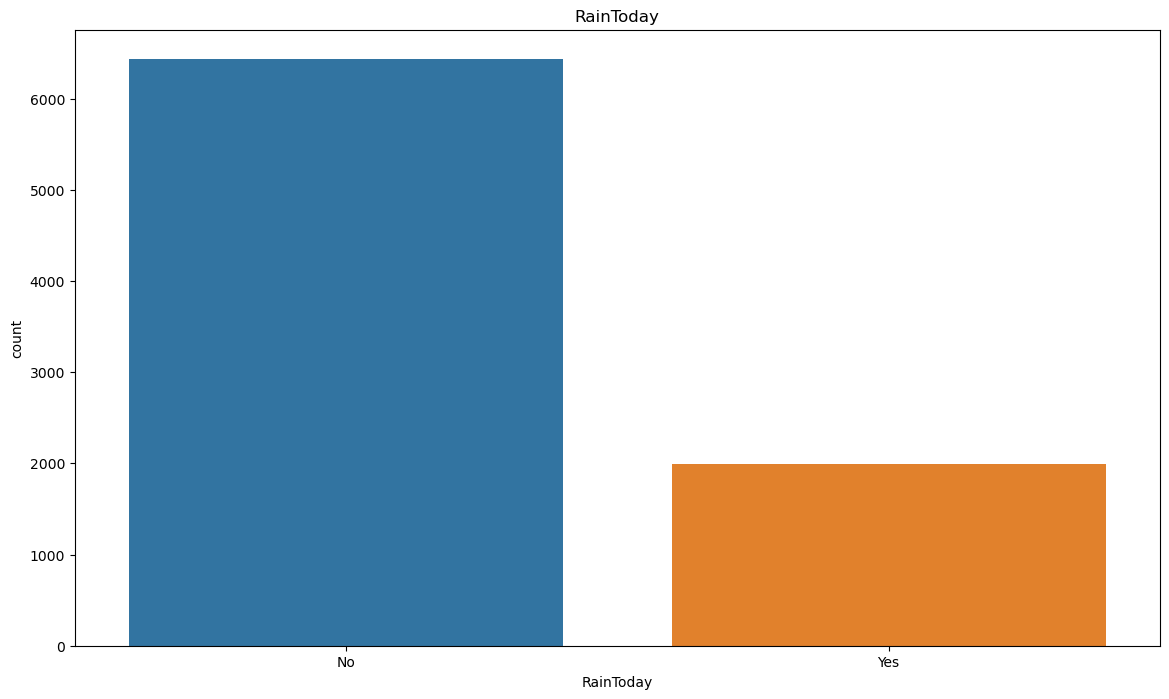

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


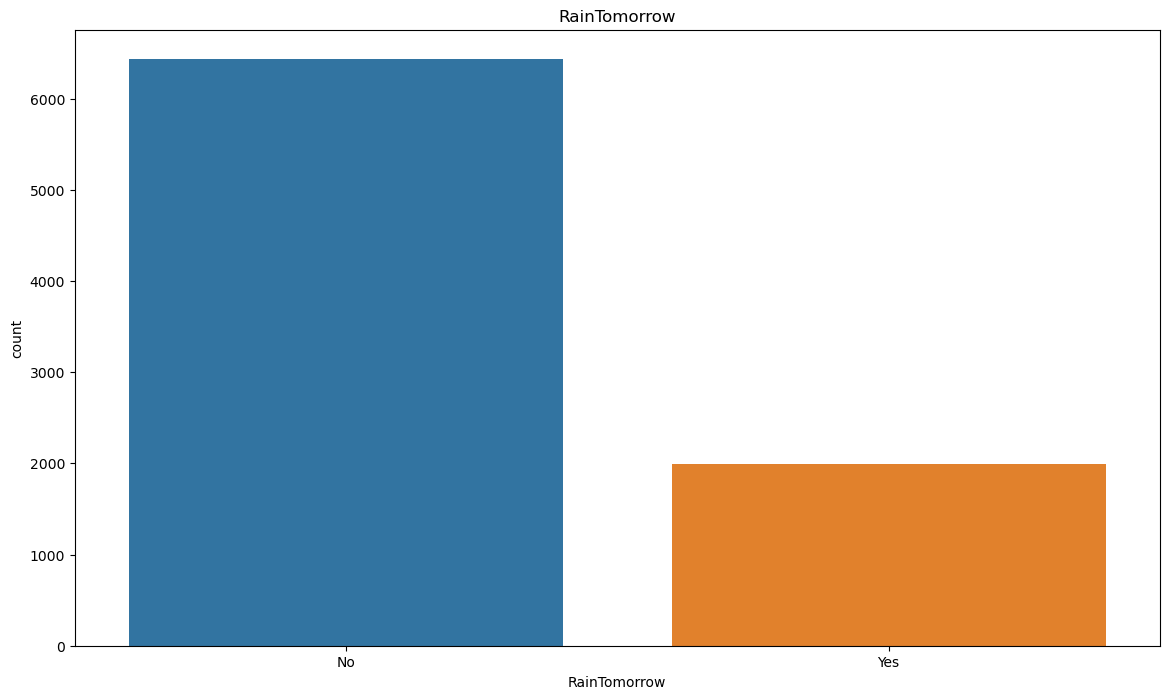

In [31]:
for i in cato_col.columns:
    plt.figure(figsize = (14,8))
    sns.countplot(cato_col[i])
    plt.title(i)
    plt.show()

So from above countplot it can be said that over target variable is imbalacned. We will balance it in later stage of project.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


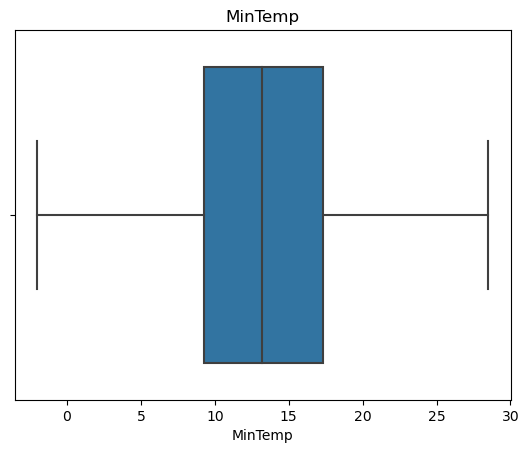

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


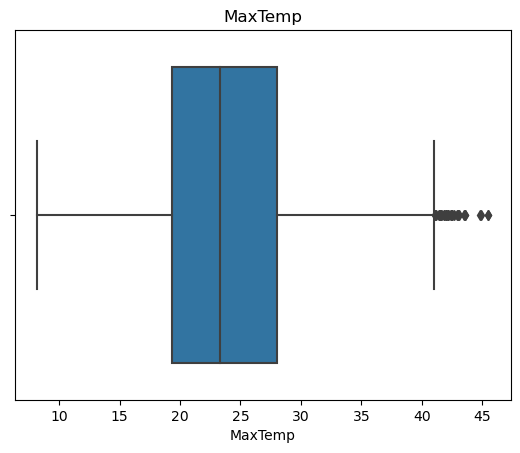

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


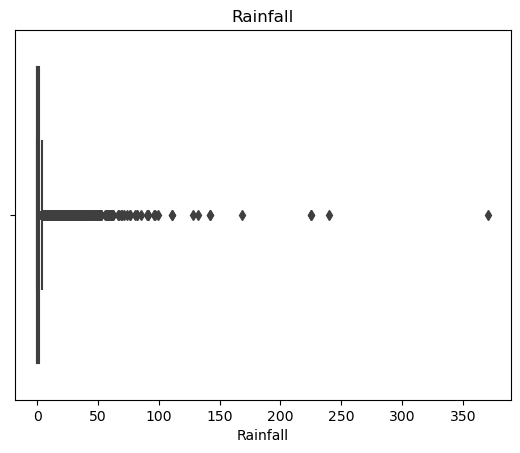

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


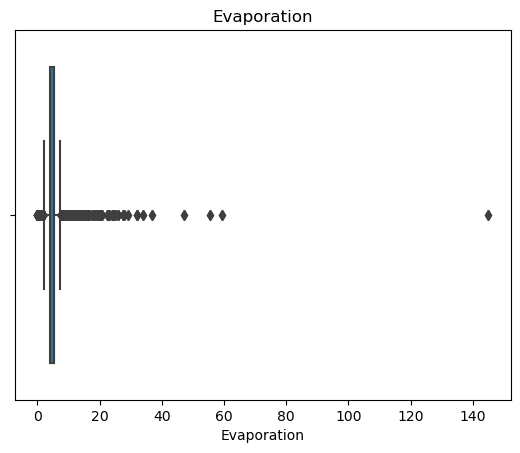

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


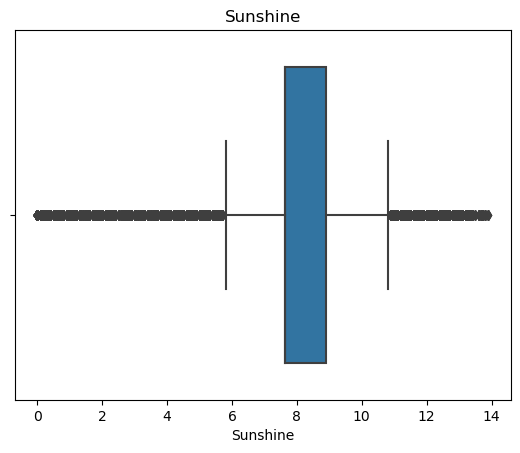

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


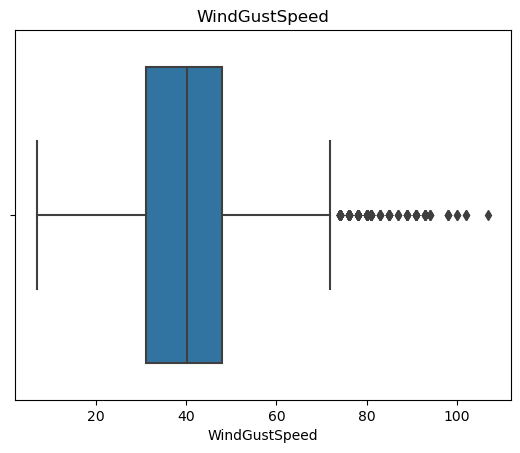

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


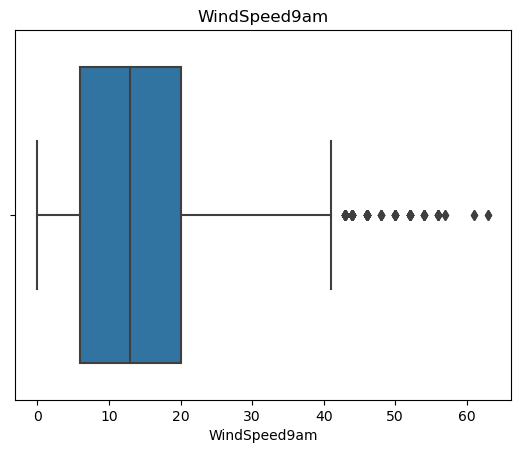

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


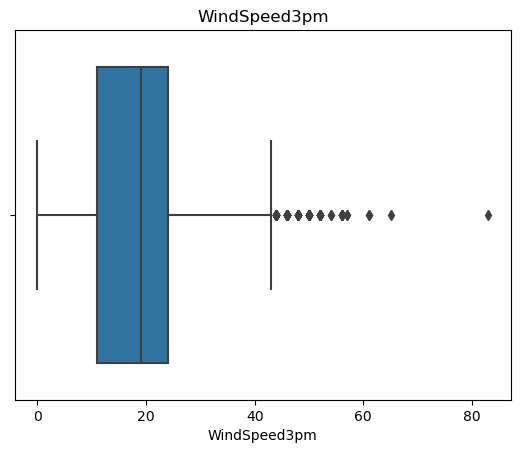

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


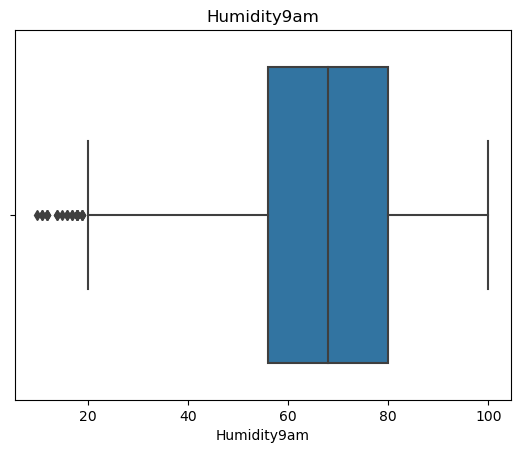

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


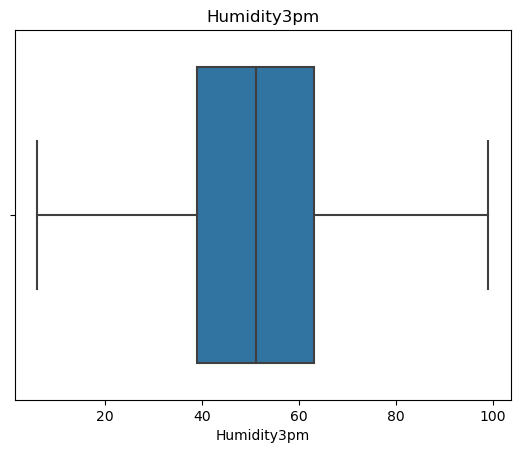

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


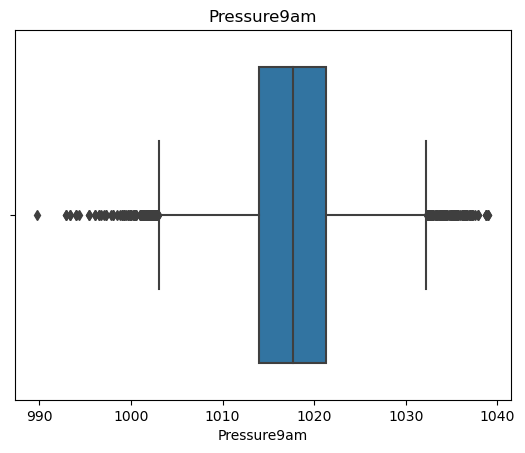

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


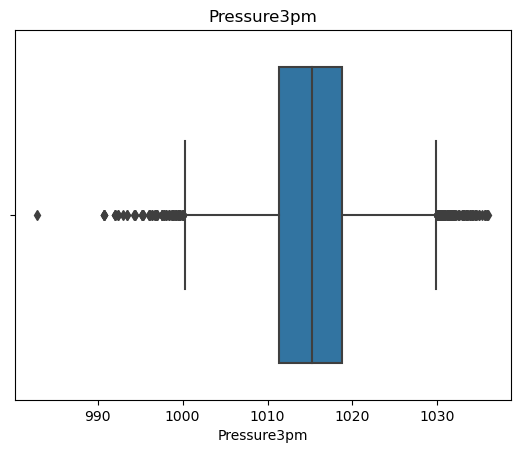

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


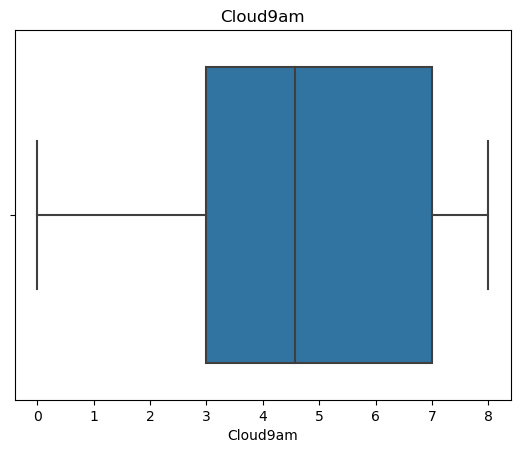

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


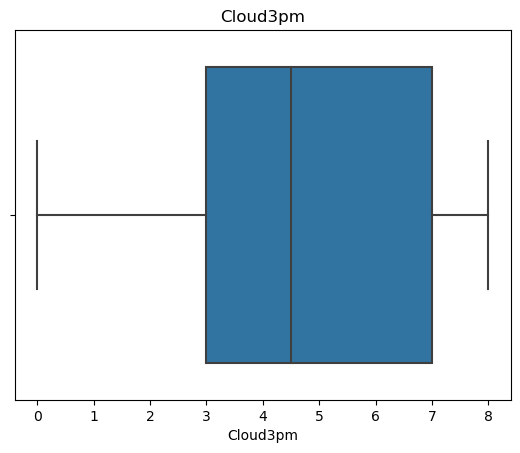

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


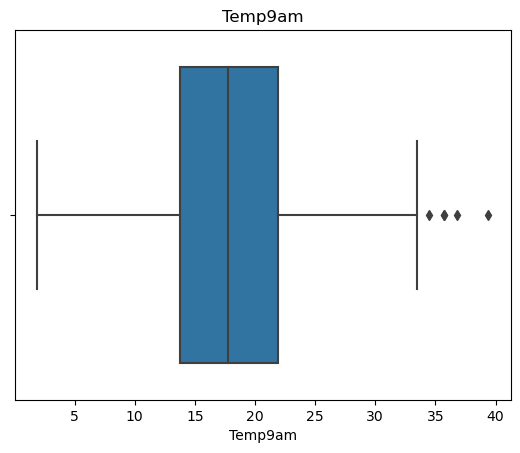

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


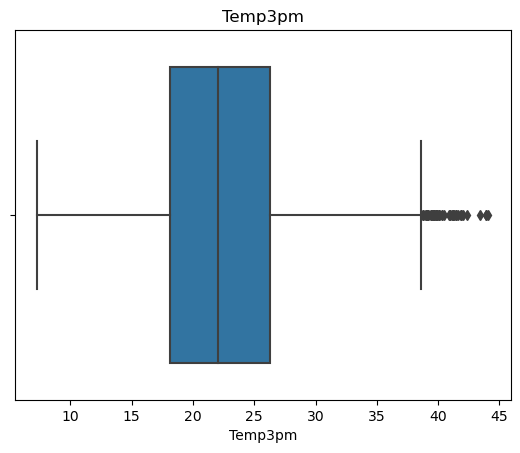

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


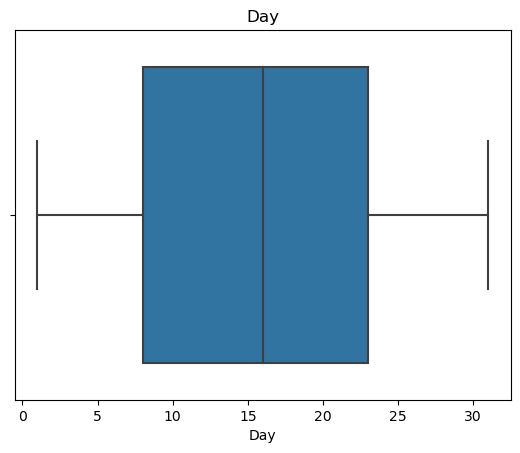

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


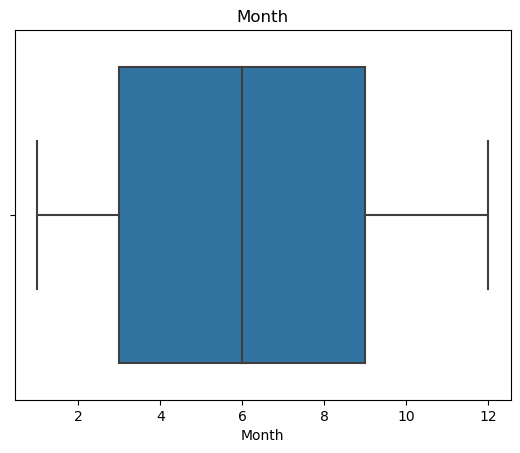

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


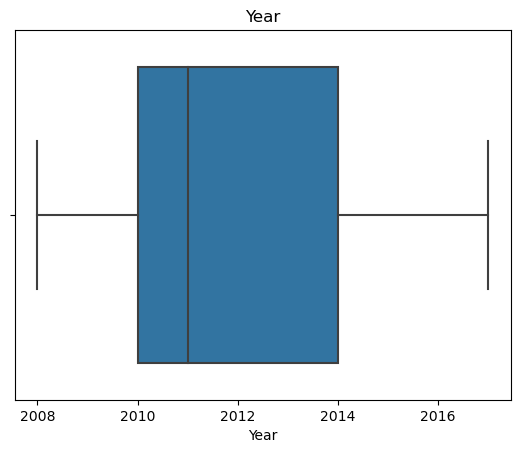

In [32]:
for i in num_col.columns:
    sns.boxplot(num_col[i])
    plt.title(i)
    plt.show()

Rainfall is one of our target variable hence we will not remove outliers from that column. We will drop that column from it and look for out liers.

In [33]:
num_col1 = num_col.drop('Rainfall', axis = 1)

In [34]:
num_col1

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,1,12,2008
1,7.4,25.100000,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,2,12,2008
2,12.9,25.700000,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,3,12,2008
3,9.2,28.000000,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,4,12,2008
4,17.5,32.300000,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,21,6,2017
8421,3.6,25.300000,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,22,6,2017
8422,5.4,26.900000,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,23,6,2017
8423,7.8,27.000000,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24,6,2017


In [35]:
from scipy.stats import zscore

In [36]:
Z = np.abs(zscore(num_col1))

In [37]:
Z

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,0.038425,1.570089e-01,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,1.677733,1.616696,1.658896
1,1.076989,2.028121e-01,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,1.563926,1.616696,1.658896
2,0.054526,3.009450e-01,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,1.450120,1.616696,1.658896
3,0.742365,6.771214e-01,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,1.336313,1.616696,1.658896
4,0.800625,1.380408e+00,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,1.222506,1.616696,1.658896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.598400,0.128611,1.980423
8421,1.783418,2.355231e-01,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.712207,0.128611,1.980423
8422,1.448794,4.972110e-01,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.826013,0.128611,1.980423
8423,1.002628,5.135665e-01,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.939820,0.128611,1.980423


In [38]:
thereshold = 3
print(np.where(Z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  563,  568,  568,  569,  602,  683,  683,  748,
        748,  980,  980, 1189, 1535, 1587, 1644, 1665, 1898, 1903, 1945,
       2016, 2028, 2043, 2074, 2186, 2219, 2219, 2230, 2500, 2505, 2527,
       2527, 2827, 2835, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2891,
       2897, 2905, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
       2975, 2989, 3051, 3058, 3059, 3059, 3060, 3066, 3067, 3067, 3067,
       3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099, 3101, 3141,
       3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185, 3206, 3212,
       3212, 3213, 3221, 3227, 3234, 3248, 3260, 3271, 3278, 3278, 3291,
       3291, 3302, 3302, 3303, 3449, 3449, 3449, 3450, 3450, 3458, 3471,
       3491, 3557, 3602, 3603, 3617, 3679, 3687, 3701, 3707, 3711, 3715,
       3721, 3729, 3735, 3743, 3749, 3757, 3763, 3

Now we will be merging the dataframe and then will create new one after removing outliers.

In [39]:
num_col.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

In [40]:
cato_col.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [41]:
df2 = num_col

In [42]:
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,1,12,2008
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,2,12,2008
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,3,12,2008
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,4,12,2008
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,21,6,2017
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,22,6,2017
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,23,6,2017
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24,6,2017


In [43]:
df2[['Location', 'WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']] = cato_col

In [44]:
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,...,21.8,1,12,2008,Albury,W,W,WNW,No,No
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,...,24.3,2,12,2008,Albury,WNW,NNW,WSW,No,No
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,...,23.2,3,12,2008,Albury,WSW,W,WSW,No,No
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,...,26.5,4,12,2008,Albury,NE,SE,E,No,No
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,...,29.7,5,12,2008,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,...,22.4,21,6,2017,Uluru,E,SE,ENE,No,No
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,...,24.5,22,6,2017,Uluru,NNW,SE,N,No,No
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,...,26.1,23,6,2017,Uluru,N,SE,WNW,No,No
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,...,26.0,24,6,2017,Uluru,SE,SSE,N,No,No


In [45]:
df2.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

We have removed the null data from the set and now we will go ahead and remove the outliers.

In [46]:
df3 = df2[(Z<3).all(axis = 1)]
df3

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,...,21.8,1,12,2008,Albury,W,W,WNW,No,No
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,...,24.3,2,12,2008,Albury,WNW,NNW,WSW,No,No
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,...,23.2,3,12,2008,Albury,WSW,W,WSW,No,No
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,...,26.5,4,12,2008,Albury,NE,SE,E,No,No
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,...,29.7,5,12,2008,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,...,22.4,21,6,2017,Uluru,E,SE,ENE,No,No
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,...,24.5,22,6,2017,Uluru,NNW,SE,N,No,No
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,...,26.1,23,6,2017,Uluru,N,SE,WNW,No,No
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,...,26.0,24,6,2017,Uluru,SE,SSE,N,No,No


We can see that the data has been removed after the removal of outliers. We have lost an 330 rows from our primary data.

We will now change our object valued data into float through encoder.

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
oe = OrdinalEncoder()

for i in df3.columns:
    if df3[i].dtypes == 'object':
        df3[i] = oe.fit_transform(df3[i].values.reshape(-1,1))

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\3298374775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[i] = oe.fit_transform(df3[i].values.reshape(-1,1))
C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\3298374775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[i] = oe.fit_transform(df3[i].values.reshape(-1,1))
C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\3298374775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [49]:
df3

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,...,21.8,1,12,2008,1.0,13.0,13.0,14.0,0.0,0.0
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,...,24.3,2,12,2008,1.0,14.0,6.0,15.0,0.0,0.0
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,...,23.2,3,12,2008,1.0,15.0,13.0,15.0,0.0,0.0
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,...,26.5,4,12,2008,1.0,4.0,9.0,0.0,0.0,0.0
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,...,29.7,5,12,2008,1.0,13.0,1.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,...,22.4,21,6,2017,9.0,0.0,9.0,1.0,0.0,0.0
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,...,24.5,22,6,2017,9.0,6.0,9.0,3.0,0.0,0.0
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,...,26.1,23,6,2017,9.0,3.0,9.0,14.0,0.0,0.0
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,...,26.0,24,6,2017,9.0,9.0,10.0,3.0,0.0,0.0


we have changed the dtype of object column and now we will move ahead.

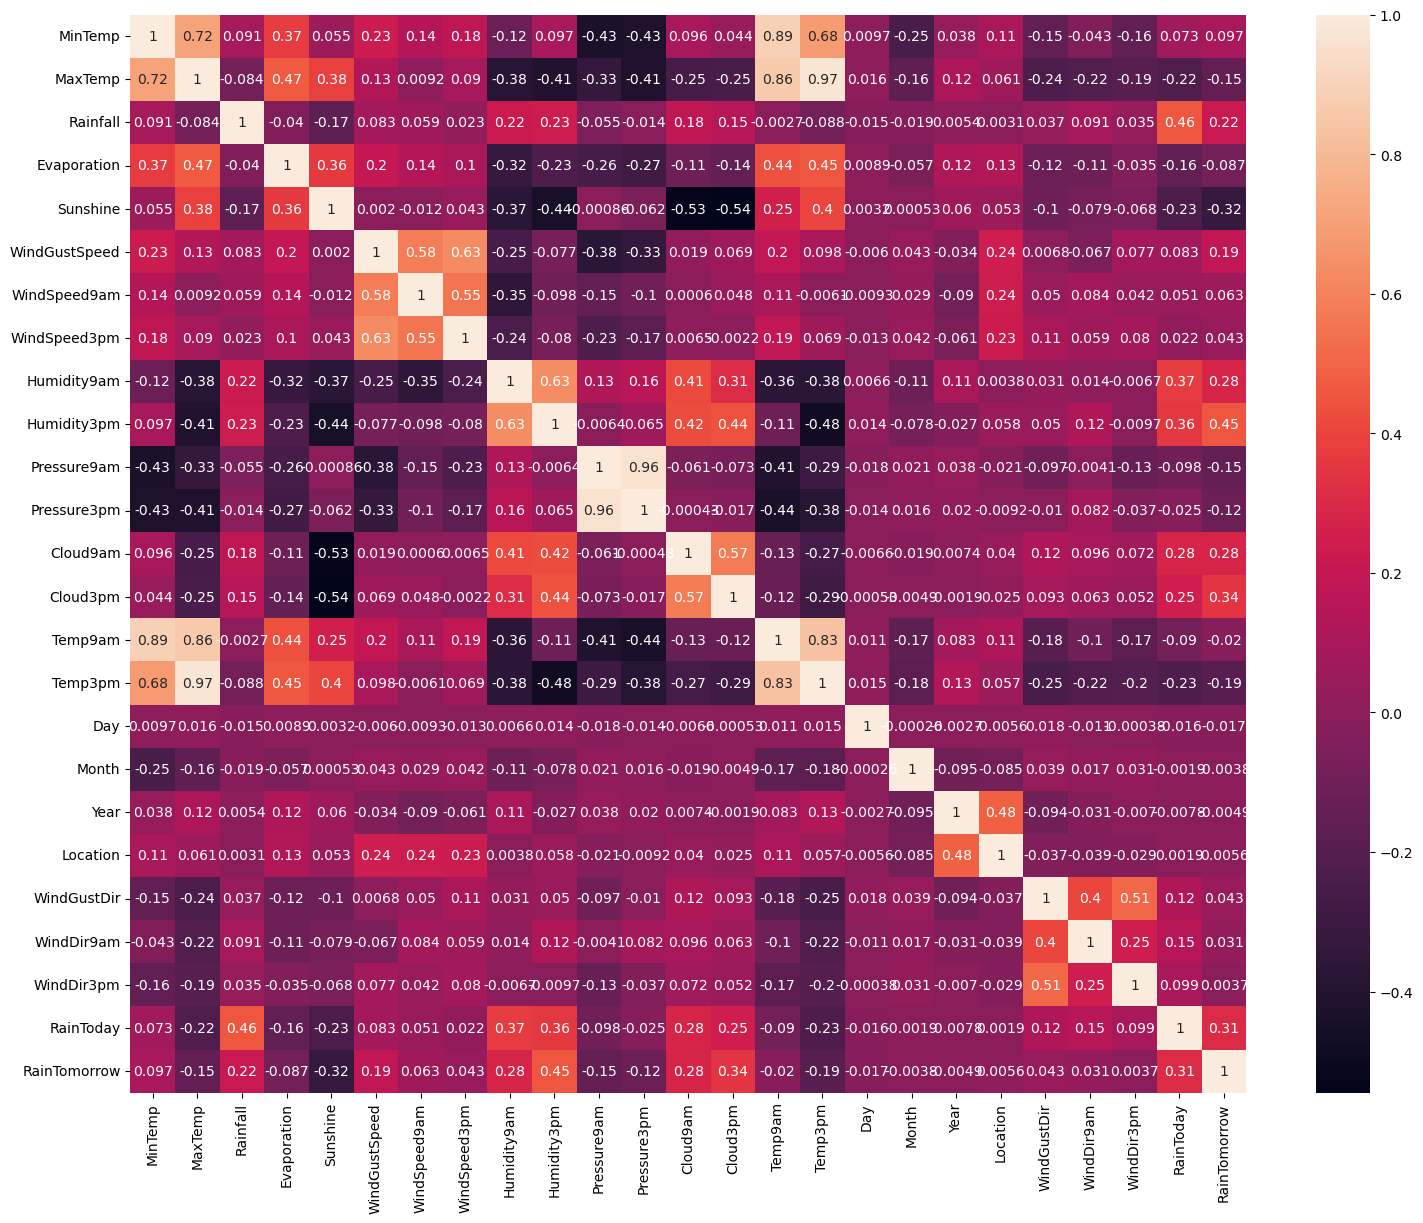

In [50]:
plt.figure(figsize = (18,14))
sns.heatmap(df3.corr(), annot = True)
plt.show()

Observations:
    
1) Maximum Temp and Temp at 3 are having highly positive correlation which means that at 3 pm the highest temprature can be seen.

2) In the same way Max temp is having high positive correlation with Temp at 9am.

3) A high negative correlation can be seen between RainTommorow and Sunshine. Which means when ever a sunshine is noted there are less possiblities of rain.

4) Pressure at 9 and pressure at 3 are having highly positive correlation which means the anyone of them increaes if other one increases.

5) Min temp is having a high positve correlation with Temp at 9 but a slight less correlation with Temp at 3. Which means as the day rises the temprature rises.

In [51]:
df3['RainTomorrow'].value_counts()

0.0    6199
1.0    1896
Name: RainTomorrow, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

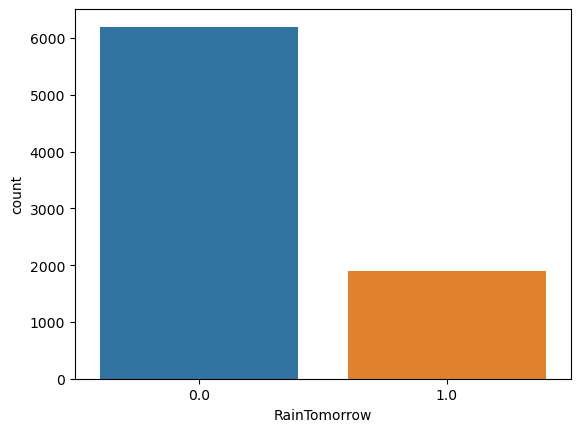

In [52]:
sns.countplot(df3['RainTomorrow'])

Here we can see that our target variable is highly biased hence we will balance it through over fitting method.

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
x = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

In [55]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,...,16.9,21.8,1,12,2008,1.0,13.0,13.0,14.0,0.0
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,...,17.2,24.3,2,12,2008,1.0,14.0,6.0,15.0,0.0
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,...,21.0,23.2,3,12,2008,1.0,15.0,13.0,15.0,0.0
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,...,18.1,26.5,4,12,2008,1.0,4.0,9.0,0.0,0.0
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,...,17.8,29.7,5,12,2008,1.0,13.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,...,10.1,22.4,21,6,2017,9.0,0.0,9.0,1.0,0.0
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,...,10.9,24.5,22,6,2017,9.0,6.0,9.0,3.0,0.0
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,...,12.5,26.1,23,6,2017,9.0,3.0,9.0,14.0,0.0
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,...,15.1,26.0,24,6,2017,9.0,9.0,10.0,3.0,0.0


In [56]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 8095, dtype: float64

In [57]:
sm = SMOTE()

xn, yn = sm.fit_resample(x,y)

In [58]:
xn

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.400000,22.900000,0.600000,5.389395,7.632205,44.000000,20.000000,24.000000,71.000000,22.000000,...,16.900000,21.800000,1,12,2008,1.000000,13.000000,13.000000,14.000000,0.000000
1,7.400000,25.100000,0.000000,5.389395,7.632205,44.000000,4.000000,22.000000,44.000000,25.000000,...,17.200000,24.300000,2,12,2008,1.000000,14.000000,6.000000,15.000000,0.000000
2,12.900000,25.700000,0.000000,5.389395,7.632205,46.000000,19.000000,26.000000,38.000000,30.000000,...,21.000000,23.200000,3,12,2008,1.000000,15.000000,13.000000,15.000000,0.000000
3,9.200000,28.000000,0.000000,5.389395,7.632205,24.000000,11.000000,9.000000,45.000000,16.000000,...,18.100000,26.500000,4,12,2008,1.000000,4.000000,9.000000,0.000000,0.000000
4,17.500000,32.300000,1.000000,5.389395,7.632205,41.000000,7.000000,20.000000,82.000000,33.000000,...,17.800000,29.700000,5,12,2008,1.000000,13.000000,1.000000,7.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12393,13.576756,21.212107,14.346636,3.483084,6.733462,43.505368,3.482810,10.741405,88.775786,73.612107,...,16.612107,19.676756,22,8,2011,2.517190,2.129298,10.836322,2.905083,1.000000
12394,15.702989,18.907337,1.994565,2.998913,0.200543,34.002717,21.506793,7.509511,90.994565,90.493207,...,16.353940,17.103804,2,7,2010,3.000000,13.495924,13.495924,11.002717,0.498641
12395,23.242086,26.662135,3.612662,4.182091,3.775835,55.536932,28.452516,20.989448,68.073864,90.505276,...,25.460024,22.665300,13,1,2011,3.021104,4.505276,3.494724,2.473620,1.000000
12396,14.983083,23.761347,0.200000,2.486945,4.517396,67.357485,24.714969,30.821258,78.212577,53.357485,...,17.207724,22.300478,21,7,2011,8.000000,6.536227,2.463773,6.714969,0.000000


In [59]:
yn

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12393    1.0
12394    1.0
12395    1.0
12396    1.0
12397    1.0
Name: RainTomorrow, Length: 12398, dtype: float64

In [60]:
yn.value_counts()

0.0    6199
1.0    6199
Name: RainTomorrow, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

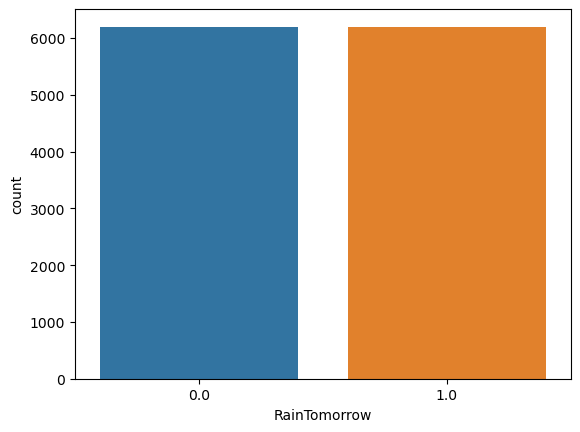

In [61]:
sns.countplot(yn)

So we have balanced our target variable, hence we can proceed ahead.

In [62]:
xn

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.400000,22.900000,0.600000,5.389395,7.632205,44.000000,20.000000,24.000000,71.000000,22.000000,...,16.900000,21.800000,1,12,2008,1.000000,13.000000,13.000000,14.000000,0.000000
1,7.400000,25.100000,0.000000,5.389395,7.632205,44.000000,4.000000,22.000000,44.000000,25.000000,...,17.200000,24.300000,2,12,2008,1.000000,14.000000,6.000000,15.000000,0.000000
2,12.900000,25.700000,0.000000,5.389395,7.632205,46.000000,19.000000,26.000000,38.000000,30.000000,...,21.000000,23.200000,3,12,2008,1.000000,15.000000,13.000000,15.000000,0.000000
3,9.200000,28.000000,0.000000,5.389395,7.632205,24.000000,11.000000,9.000000,45.000000,16.000000,...,18.100000,26.500000,4,12,2008,1.000000,4.000000,9.000000,0.000000,0.000000
4,17.500000,32.300000,1.000000,5.389395,7.632205,41.000000,7.000000,20.000000,82.000000,33.000000,...,17.800000,29.700000,5,12,2008,1.000000,13.000000,1.000000,7.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12393,13.576756,21.212107,14.346636,3.483084,6.733462,43.505368,3.482810,10.741405,88.775786,73.612107,...,16.612107,19.676756,22,8,2011,2.517190,2.129298,10.836322,2.905083,1.000000
12394,15.702989,18.907337,1.994565,2.998913,0.200543,34.002717,21.506793,7.509511,90.994565,90.493207,...,16.353940,17.103804,2,7,2010,3.000000,13.495924,13.495924,11.002717,0.498641
12395,23.242086,26.662135,3.612662,4.182091,3.775835,55.536932,28.452516,20.989448,68.073864,90.505276,...,25.460024,22.665300,13,1,2011,3.021104,4.505276,3.494724,2.473620,1.000000
12396,14.983083,23.761347,0.200000,2.486945,4.517396,67.357485,24.714969,30.821258,78.212577,53.357485,...,17.207724,22.300478,21,7,2011,8.000000,6.536227,2.463773,6.714969,0.000000


In [63]:
xn.skew()

MinTemp          -0.113700
MaxTemp           0.376155
Rainfall         10.456749
Evaporation       0.833733
Sunshine         -0.630967
WindGustSpeed     0.472039
WindSpeed9am      0.628151
WindSpeed3pm      0.256737
Humidity9am      -0.391372
Humidity3pm      -0.036488
Pressure9am       0.043693
Pressure3pm       0.077202
Cloud9am         -0.566092
Cloud3pm         -0.514804
Temp9am          -0.006386
Temp3pm           0.391539
Day               0.039979
Month             0.096399
Year              0.470594
Location         -0.031048
WindGustDir       0.105446
WindDir9am        0.143023
WindDir3pm       -0.140200
RainToday         0.760061
dtype: float64

Skewness can only be seen in Rainfall column.

In [64]:
from sklearn.preprocessing import PowerTransformer

In [65]:
pt = PowerTransformer()

for i in xn.columns:
    xn[i] = pt.fit_transform(xn[i].values.reshape(-1,1))

In [66]:
xn.skew()

MinTemp         -0.098125
MaxTemp         -0.009694
Rainfall         0.556871
Evaporation      0.077211
Sunshine        -0.121226
WindGustSpeed   -0.000661
WindSpeed9am    -0.111842
WindSpeed3pm    -0.091147
Humidity9am     -0.097816
Humidity3pm     -0.067472
Pressure9am     -0.000627
Pressure3pm     -0.000881
Cloud9am        -0.308321
Cloud3pm        -0.255655
Temp9am         -0.048004
Temp3pm         -0.010013
Day             -0.198632
Month           -0.130630
Year             0.000000
Location        -0.163307
WindGustDir     -0.174396
WindDir9am      -0.150667
WindDir3pm      -0.227551
RainToday        0.661057
dtype: float64

We have reduced the skewness now we will standardize the data using the standard scaler.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
ss = StandardScaler()

x1 = pd.DataFrame(ss.fit_transform(xn), columns = xn.columns)

In [69]:
x1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,Day,Month,Year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,-0.006414,0.042299,0.040564,0.264932,0.139062,0.321736,0.750144,0.640785,-0.079577,-1.845846,...,-0.113271,0.116210,-1.906610,1.625924,-1.658363,-1.649906,1.194682,1.196792,1.419854,-0.735484
1,-1.155878,0.411633,-0.860141,0.264932,0.139062,0.321736,-1.062008,0.444610,-1.594769,-1.683391,...,-0.057406,0.537660,-1.710797,1.625924,-1.658363,-1.649906,1.368178,-0.198443,1.641448,-0.735484
2,-0.102568,0.508780,-0.860141,0.264932,0.139062,0.466082,0.662287,0.832843,-1.874513,-1.414172,...,0.645913,0.355662,-1.534199,1.625924,-1.658363,-1.649906,1.537517,1.196792,1.641448,-0.735484
3,-0.812153,0.868401,-0.860141,0.264932,0.139062,-1.354322,-0.129119,-0.976387,-1.545977,-2.173298,...,0.109874,0.887026,-1.370639,1.625924,-1.658363,-1.649906,-0.663074,0.446640,-1.948534,-0.735484
4,0.784004,1.493309,0.356921,0.264932,0.139062,0.098968,-0.616990,0.243858,0.645565,-1.253446,...,0.054166,1.364644,-1.216771,1.625924,-1.658363,-1.649906,1.194682,-1.622451,-0.178851,-0.735484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12393,0.027591,-0.256537,1.598792,-0.643318,-0.197758,0.285537,-1.149962,-0.765659,1.120584,0.882531,...,-0.166933,-0.265584,0.783318,0.575010,-0.404832,-1.080888,-1.180524,0.803450,-1.175335,1.428631
12394,0.437163,-0.689786,0.796236,-0.896912,-2.107601,-0.454334,0.879038,-1.164605,1.280669,1.755459,...,-0.215096,-0.763480,-1.710797,0.290867,-0.821916,-0.909158,1.281266,1.283465,0.746714,1.011785
12395,1.895840,0.661604,1.125462,-0.295388,-1.199030,1.114993,1.428481,0.343779,-0.262510,1.756080,...,1.462559,0.265281,-0.178825,-1.778216,-0.404832,-0.901732,-0.536285,-0.828354,-1.285015,1.428631
12396,0.298385,0.189464,-0.467289,-1.178548,-0.965015,1.846300,1.141122,1.281085,0.389340,-0.175013,...,-0.055969,0.202863,0.682967,0.290867,-0.404832,0.724527,-0.064307,-1.127299,-0.246251,-0.735484


We have standardize the data now we will check the variance inflation factor to check multicolinearity.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as var

In [71]:
vif = pd.DataFrame()

vif['Values'] = [var(x1.values,i)for i in range (len(x1.columns))]
vif['Features'] = x1.columns

In [72]:
vif

,Values,Features
0,9.699715,MinTemp
1,25.105824,MaxTemp
2,6.448816,Rainfall
3,1.535751,Evaporation
4,2.027999,Sunshine
5,2.220096,WindGustSpeed
6,2.051638,WindSpeed9am
7,2.044460,WindSpeed3pm
8,4.308516,Humidity9am
9,6.156074,Humidity3pm


In many columns the values of vif is higher hence we will remove the column which is having the highest value(Temp3pm).

In [73]:
x1.drop('Temp3pm', axis = 1, inplace = True)

In [74]:
vif1 = pd.DataFrame()

vif1['Values'] = [var(x1.values,i)for i in range (len(x1.columns))]
vif1['Features'] = x1.columns
vif1

,Values,Features
0,9.666921,MinTemp
1,10.010230,MaxTemp
2,6.442851,Rainfall
3,1.535751,Evaporation
4,2.027991,Sunshine
5,2.195643,WindGustSpeed
6,2.051346,WindSpeed9am
7,2.044262,WindSpeed3pm
8,3.725787,Humidity9am
9,3.785850,Humidity3pm


Pressure9am is also having a high variance inflation factor hence we will drop the column.

In [75]:
x1.drop('Pressure9am', axis = 1, inplace = True)

In [76]:
vif2 = pd.DataFrame()

vif2['Values'] = [var(x1.values,i)for i in range (len(x1.columns))]
vif2['Features'] = x1.columns
vif2

,Values,Features
0,9.546057,MinTemp
1,9.707932,MaxTemp
2,6.388125,Rainfall
3,1.517798,Evaporation
4,2.024256,Sunshine
5,2.172559,WindGustSpeed
6,2.050078,WindSpeed9am
7,2.032350,WindSpeed3pm
8,3.725258,Humidity9am
9,3.785627,Humidity3pm


We have already removed 2 columns from the set, hence we will not remove more. We will go forward with these columns.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Searching for best Random State.

In [78]:
maxrs= 0
maxac = 0

for i in range(1,200):
    x_train,x_test, y_train,y_test = train_test_split(x1,yn, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    ac = accuracy_score(y_test, pred)
    if ac > maxac:
        maxac = ac
        maxrs = i
        
print('The highest accuracy score is', maxac , 'at random state', maxrs)

The highest accuracy score is 0.796505376344086 at random state 67


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x1,yn,test_size = 0.30, random_state = 183)

In [80]:
lg.fit(x_train,y_train)
lgpred = lg.predict(x_test)
lgac = accuracy_score(y_test, lgpred)
lgcon = confusion_matrix(y_test, lgpred)
lgclass = classification_report(y_test, lgpred)

print(lgac.round(2))
print(lgcon)
print(lgclass)

0.79
[[1522  344]
 [ 440 1414]]
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1866
         1.0       0.80      0.76      0.78      1854

    accuracy                           0.79      3720
   macro avg       0.79      0.79      0.79      3720
weighted avg       0.79      0.79      0.79      3720



In [81]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
rfcac = accuracy_score(y_test,rfcpred)
rfccon = confusion_matrix(y_test, rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print(rfcac.round(2))
print(rfccon)
print(rfcclass)

0.93
[[1753  113]
 [ 145 1709]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      1866
         1.0       0.94      0.92      0.93      1854

    accuracy                           0.93      3720
   macro avg       0.93      0.93      0.93      3720
weighted avg       0.93      0.93      0.93      3720



In [82]:
etc = ExtraTreesClassifier()

etc.fit(x_train,y_train)
etcpred = etc.predict(x_test)
etcac = accuracy_score(y_test, etcpred)
etccon = confusion_matrix(y_test, etcpred)
etcclass = classification_report(y_test, etcpred)

print(etcac.round(2))
print(etccon)
print(etcclass)

0.94
[[1744  122]
 [ 112 1742]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1866
         1.0       0.93      0.94      0.94      1854

    accuracy                           0.94      3720
   macro avg       0.94      0.94      0.94      3720
weighted avg       0.94      0.94      0.94      3720



In [83]:
gbc = GradientBoostingClassifier()

gbc.fit(x_train,y_train)
gbcpred = gbc.predict(x_test)
gbcac = accuracy_score(y_test, gbcpred)
gbccon = confusion_matrix(y_test, gbcpred)
gbcclass = classification_report(y_test, gbcpred)

print(gbcac.round(2))
print(gbccon)
print(gbcclass)

0.87
[[1657  209]
 [ 290 1564]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1866
         1.0       0.88      0.84      0.86      1854

    accuracy                           0.87      3720
   macro avg       0.87      0.87      0.87      3720
weighted avg       0.87      0.87      0.87      3720



In [84]:
adc = AdaBoostClassifier()

adc.fit(x_train,y_train)
adcpred = adc.predict(x_test)
adcac = accuracy_score(y_test, adcpred)
adccon = confusion_matrix(y_test, adcpred)
adcclass = classification_report(y_test, adcpred)

print(adcac.round(2))
print(adccon)
print(adcclass)

0.83
[[1570  296]
 [ 336 1518]]
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1866
         1.0       0.84      0.82      0.83      1854

    accuracy                           0.83      3720
   macro avg       0.83      0.83      0.83      3720
weighted avg       0.83      0.83      0.83      3720



In [85]:
from sklearn.ensemble import BaggingClassifier

In [86]:
bc= BaggingClassifier()

bc.fit(x_train,y_train)
bcpred = bc.predict(x_test)
bcac = accuracy_score(y_test, bcpred)
bccon = confusion_matrix(y_test, bcpred)
bcclass = classification_report(y_test, bcpred)

print(bcac.round(2))
print(bccon)
print(bcclass)

0.91
[[1730  136]
 [ 207 1647]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1866
         1.0       0.92      0.89      0.91      1854

    accuracy                           0.91      3720
   macro avg       0.91      0.91      0.91      3720
weighted avg       0.91      0.91      0.91      3720



In [87]:
svc = SVC()

svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcac = accuracy_score(y_test, svcpred)
svccon = confusion_matrix(y_test, svcpred)
svcclass = classification_report(y_test, svcpred)

print(svcac.round(2))
print(svccon)
print(svcclass)

0.87
[[1602  264]
 [ 216 1638]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1866
         1.0       0.86      0.88      0.87      1854

    accuracy                           0.87      3720
   macro avg       0.87      0.87      0.87      3720
weighted avg       0.87      0.87      0.87      3720



The Accuracy Scores for the all models is as follows

In [88]:
print('The Accuracy score for Logistic Regression', lgac.round(2))
print('The Accuracy score for Random Forest', rfcac.round(2))
print('The Accuracy score for Extra Trees', etcac.round(2))
print('The Accuracy score for Gradient Boost', gbcac.round(2))
print('The Accuracy score for Ada Boost', adcac.round(2))
print('The Accuracy score for Bagging Classifier', bcac.round(2))
print('The Accuracy score for Support Vector', svcac.round(2))

The Accuracy score for Logistic Regression 0.79
The Accuracy score for Random Forest 0.93
The Accuracy score for Extra Trees 0.94
The Accuracy score for Gradient Boost 0.87
The Accuracy score for Ada Boost 0.83
The Accuracy score for Bagging Classifier 0.91
The Accuracy score for Support Vector 0.87


It can bee seen that Extra Trees is having the highest accuracy score followed by Random Forest. We will check with the Cross_val_score now.

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cvs = cross_val_score

print('The Cross Val Score for Logistic Regression', cvs(lg, x1,yn).mean())
print('The Cross Val Score for Random Forest', cvs(rfc,x1,yn).mean())
print('The Cross Val Score for Extra Trees', cvs(etc,x1,yn).mean())
print('The Cross Val Score for Gradient Boost', cvs(gbc,x1,yn).mean())
print('The Cross Val Score for Ada Boost', cvs(adc,x1,yn).mean())
print('The Cross Val Score for Bagging Classifier', cvs(bc,x1,yn).mean())
print('The Cross Val Score for Support Vector', cvs(svc,x1,yn).mean())

The Cross Val Score for Logistic Regression 0.7172255982511159
The Cross Val Score for Random Forest 0.8053811370349646
The Cross Val Score for Extra Trees 0.8042520722455725
The Cross Val Score for Gradient Boost 0.6850387122799255
The Cross Val Score for Ada Boost 0.688676690653099
The Cross Val Score for Bagging Classifier 0.7790834949055941
The Cross Val Score for Support Vector 0.7405356283100626


It can be seen that the cross val score for every model seems to be similar and in limits. It can be said that Extra Trees is our best fitting model hence we wil go ahead doo hyper parameter tunning on it and save it.

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2']}

In [93]:
gcv = GridSearchCV(ExtraTreesClassifier(), param, cv =5)

In [94]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [95]:
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}

In [96]:
fm = ExtraTreesClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 100)

In [97]:
fm.fit(x_train,y_train)
fmpred = fm.predict(x_test)
fmac = accuracy_score(y_test,fmpred)
fmcon = confusion_matrix(y_test, fmpred)
fmclass = classification_report(y_test, fmpred)

print(fmac.round(2))
print(fmcon)
print(fmclass)

0.94
[[1747  119]
 [ 116 1738]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1866
         1.0       0.94      0.94      0.94      1854

    accuracy                           0.94      3720
   macro avg       0.94      0.94      0.94      3720
weighted avg       0.94      0.94      0.94      3720



We have done our hyper parameter tunning hence we will go ahead and save this model.

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC AUC Plot')

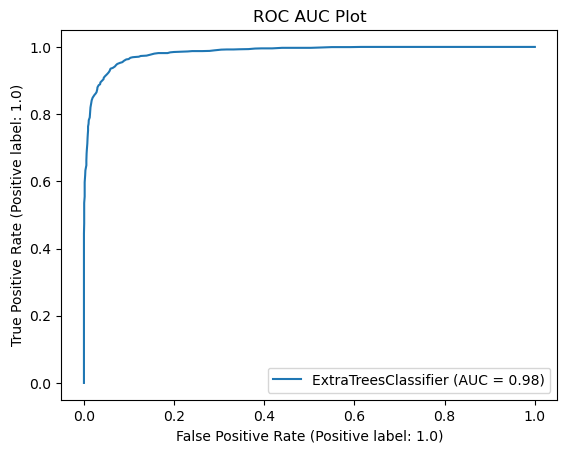

In [99]:
plot_roc_curve(fm, x_test,y_test)
plt.title('ROC AUC Plot')

Saving the Final model.

In [100]:
import joblib

In [101]:
joblib.dump(fm,'Rain Prediction yes-no')

['Rain Prediction yes-no']

In [102]:
model = joblib.load('Rain Prediction yes-no')

In [103]:
predi = model.predict(x_test)

In [104]:
A = np.array(y_test)

In [105]:
Rain = pd.DataFrame()

Rain['Predicted'] = predi
Rain['Original'] = A

Rain

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3715,1.0,1.0
3716,1.0,1.0
3717,0.0,0.0
3718,1.0,1.0


## Predicting Amount of Rainfall

In [106]:
dfr=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
dfr.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [107]:

dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [108]:

dfr.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [109]:
dfr['Date'] = pd.to_datetime(dfr['Date'])

In [110]:
dfr.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [111]:

dfr['Day'] = pd.to_datetime(dfr.Date,format="%d/%m/%Y").dt.day


dfr['Month'] = pd.to_datetime(dfr.Date, format="%d/%m/%Y").dt.month


dfr['Year'] = pd.to_datetime(dfr.Date, format="%d/%m/%Y").dt.year

In [112]:
dfr.drop(columns=['Date'],axis=1,inplace=True)

In [113]:
dfr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [114]:

dfr['MinTemp'] = dfr['MinTemp'].fillna(dfr['MinTemp'].mean())


dfr['MaxTemp'] = dfr['MaxTemp'].fillna(dfr['MaxTemp'].mean())


dfr['Rainfall'] = dfr['Rainfall'].fillna(dfr['Rainfall'].mode()[0])


dfr['Evaporation'] = dfr['Evaporation'].fillna(dfr['Evaporation'].mean())


dfr['Sunshine'] = dfr['Sunshine'].fillna(dfr['Sunshine'].mean())


dfr['WindGustDir'] = dfr['WindGustDir'].fillna(dfr['WindGustDir'].mode()[0])


dfr['WindGustSpeed'] = dfr['WindGustSpeed'].fillna(dfr['WindGustSpeed'].mean())


dfr['WindDir9am'] = dfr['WindDir9am'].fillna(dfr['WindDir9am'].mode()[0])


dfr['WindDir3pm'] = dfr['WindDir3pm'].fillna(dfr['WindDir3pm'].mode()[0])


dfr['WindSpeed9am'] = dfr['WindSpeed9am'].fillna(dfr['WindSpeed9am'].mean())


dfr['WindSpeed3pm'] = dfr['WindSpeed3pm'].fillna(dfr['WindSpeed3pm'].mean())


dfr['Humidity9am'] = dfr['Humidity9am'].fillna(dfr['Humidity9am'].mean())


dfr['Humidity3pm'] = dfr['Humidity3pm'].fillna(dfr['Humidity3pm'].mean())


dfr['Pressure9am'] = dfr['Pressure9am'].fillna(dfr['Pressure9am'].mean())


dfr['Pressure3pm'] = dfr['Pressure3pm'].fillna(dfr['Pressure3pm'].mean())


dfr['Cloud9am'] = dfr['Cloud9am'].fillna(dfr['Cloud9am'].mean())


dfr['Cloud3pm'] = dfr['Cloud3pm'].fillna(dfr['Cloud3pm'].mean())


dfr['Temp9am'] = dfr['Temp9am'].fillna(dfr['Temp9am'].mean())


dfr['Temp3pm'] = dfr['Temp3pm'].fillna(dfr['Temp3pm'].mean())


dfr['Temp3pm'] = dfr['Temp3pm'].fillna(dfr['Temp3pm'].mean())


dfr['RainToday'] = dfr['RainToday'].fillna(dfr['RainToday'].mode()[0])


dfr['RainTomorrow'] = dfr['RainTomorrow'].fillna(dfr['RainTomorrow'].mode()[0])

In [115]:
dfr.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

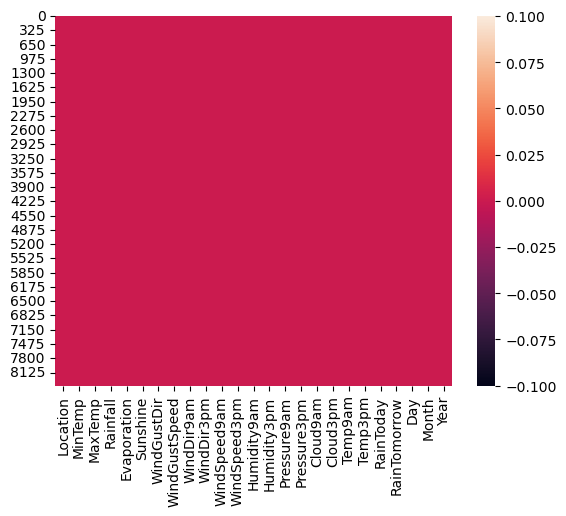

In [116]:
sns.heatmap(dfr.isnull())

In [117]:
dfr.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


Overall the data set looks good as there are no negative or invalid values.

In [118]:
dfr.shape

(8425, 25)

In [119]:
dfr.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [120]:
dfr.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\3200711395.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfr.skew()


MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.200523
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
Day               0.004260
Month             0.039388
Year              0.418663
dtype: float64

In [121]:
f1 = dfr[['MinTemp','MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

In [122]:
f1

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8
1,7.4,25.100000,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3
2,12.9,25.700000,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2
3,9.2,28.000000,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5
4,17.5,32.300000,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4
8421,3.6,25.300000,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5
8422,5.4,26.900000,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1
8423,7.8,27.000000,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [123]:
Z1 = np.abs(zscore(f1))

Z1

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.038425,1.570089e-01,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138
1,1.076989,2.028121e-01,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348
2,0.054526,3.009450e-01,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334
3,0.742365,6.771214e-01,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376
4,0.800625,1.380408e+00,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221
8421,1.783418,2.355231e-01,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987
8422,1.448794,4.972110e-01,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099
8423,1.002628,5.135665e-01,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279


Rainfall excluded for detecting outlier as it is our target variable.

In [124]:
threshold = 3
print(np.where(Z1>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  563,  568,  568,  569,  602,  683,  683,  748,
        748,  980,  980, 1189, 1535, 1587, 1644, 1665, 1898, 1903, 1945,
       2016, 2028, 2043, 2074, 2186, 2219, 2219, 2230, 2500, 2505, 2527,
       2527, 2827, 2835, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2891,
       2897, 2905, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
       2975, 2989, 3051, 3058, 3059, 3059, 3060, 3066, 3067, 3067, 3067,
       3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099, 3101, 3141,
       3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185, 3206, 3212,
       3212, 3213, 3221, 3227, 3234, 3248, 3260, 3271, 3278, 3278, 3291,
       3291, 3302, 3302, 3303, 3449, 3449, 3449, 3450, 3450, 3458, 3471,
       3491, 3557, 3602, 3603, 3617, 3679, 3687, 3701, 3707, 3711, 3715,
       3721, 3729, 3735, 3743, 3749, 3757, 3763, 3

In [125]:
dfr1 = dfr[(Z1<3).all(axis = 1)]

In [126]:
dfr1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


We have removed the outliers from the data & we have lost 325 rows from our data set. 

Now we will change our columns of object data dtype into integer dtype.

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le = LabelEncoder()

for i in dfr1.columns:
    if dfr1[i].dtypes == 'object':
        dfr1[i] = le.fit_transform(dfr1[i].values.reshape(-1,1)) 

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\2252254308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr1[i] = le.fit_transform(dfr1[i].values.reshape(-1,1))


In [129]:
dfr1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


Checking the relation of input variables with our target variable - Rainfall.

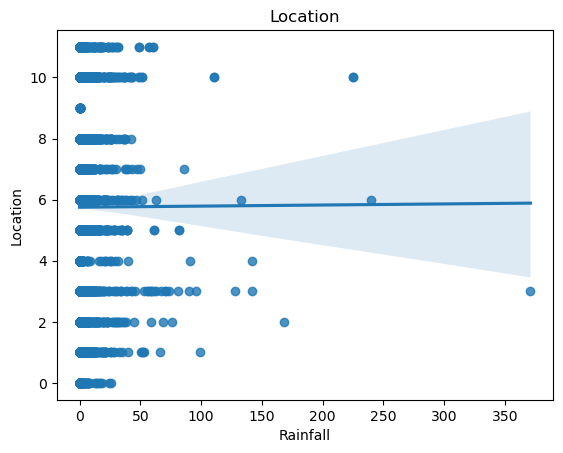

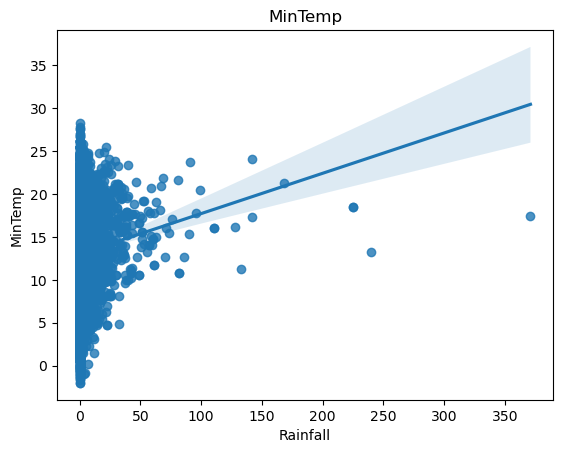

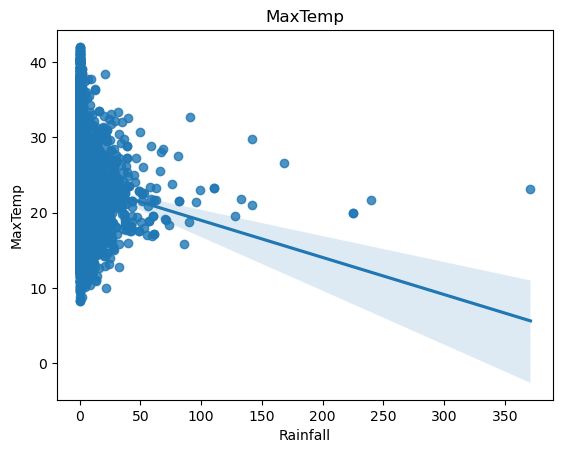

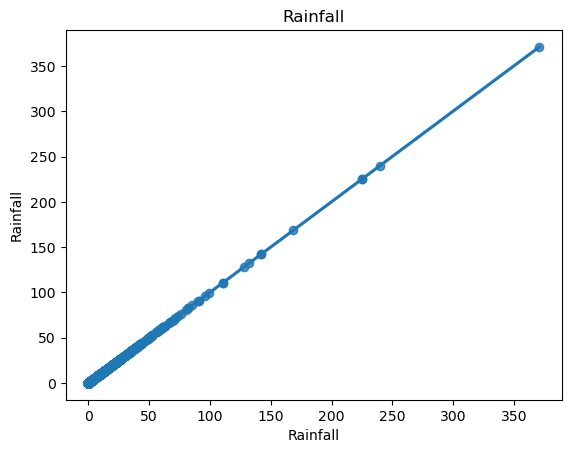

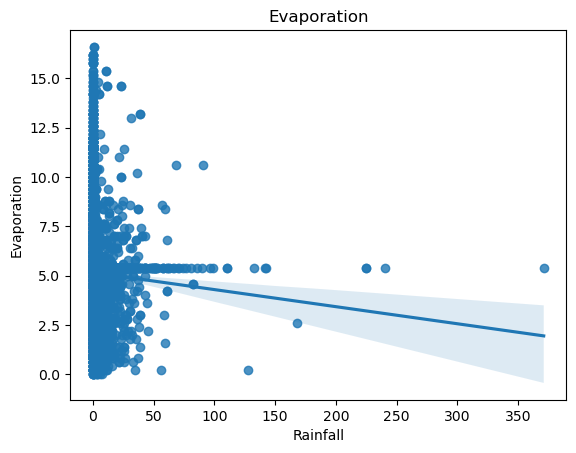

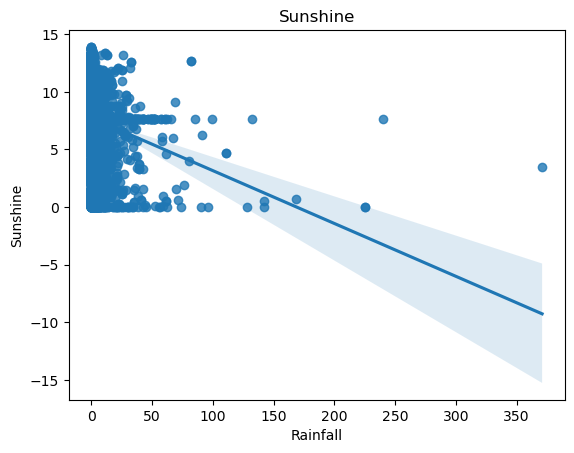

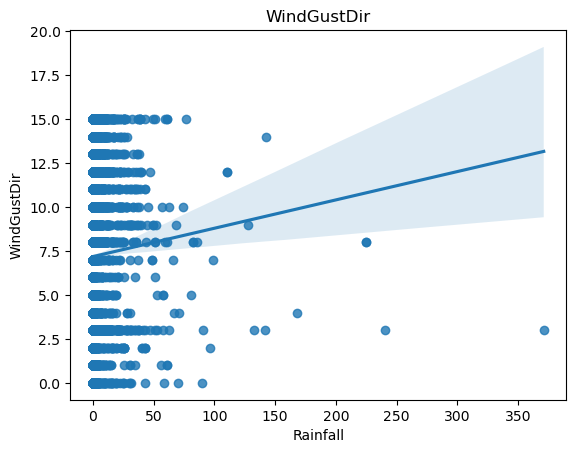

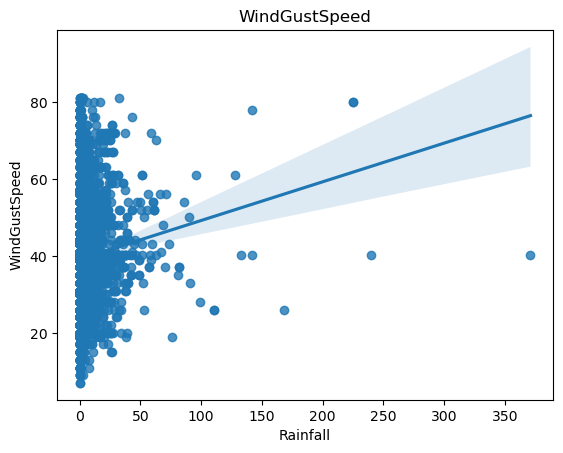

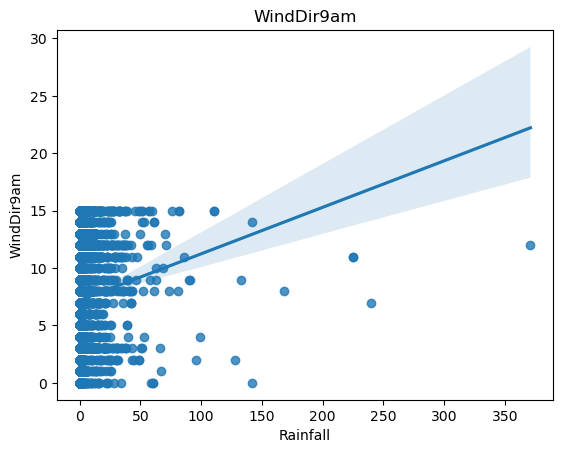

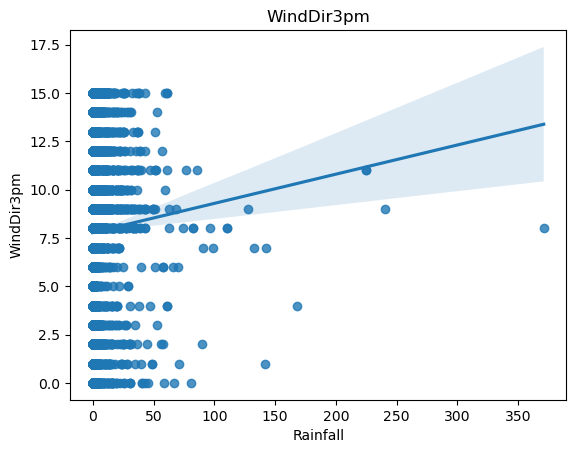

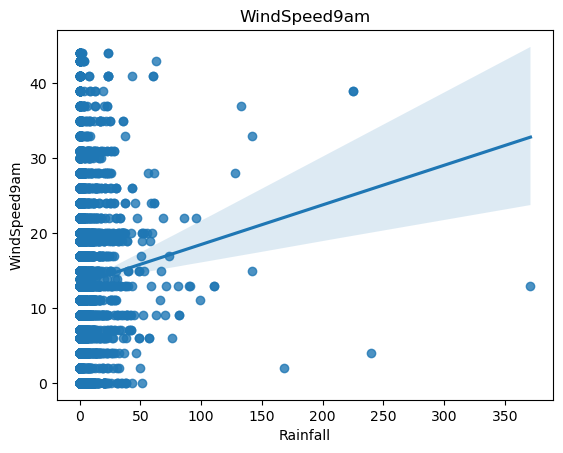

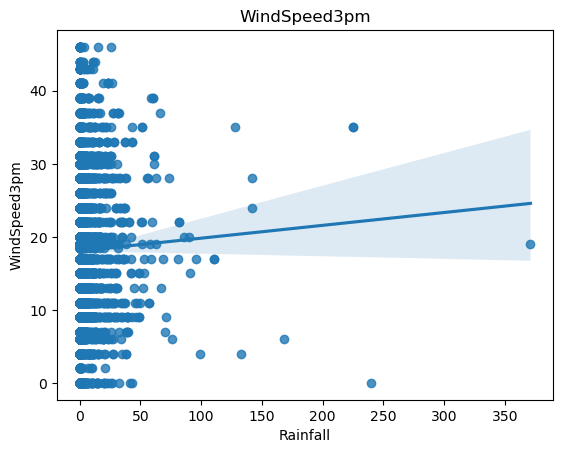

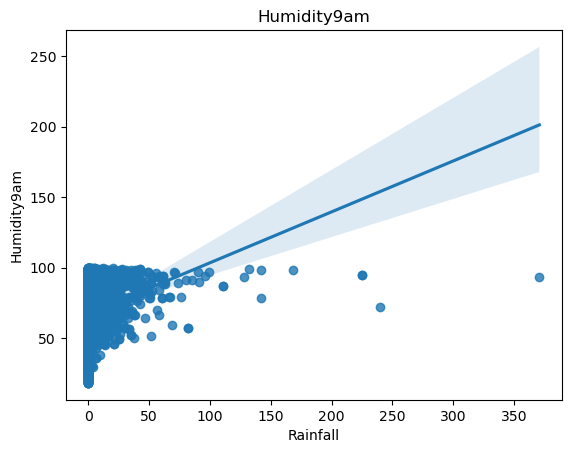

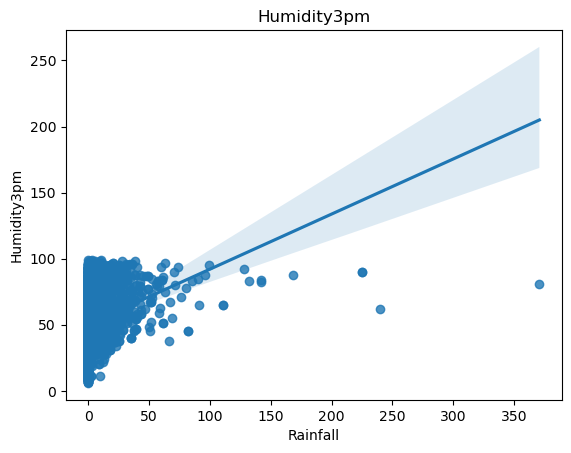

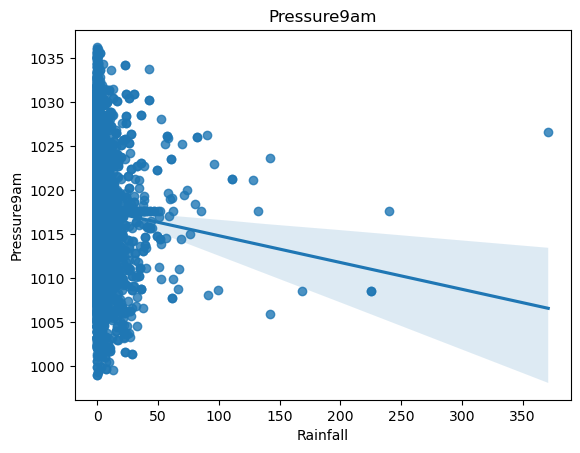

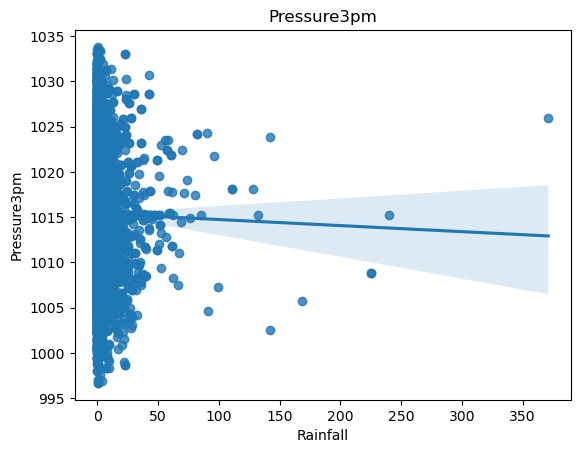

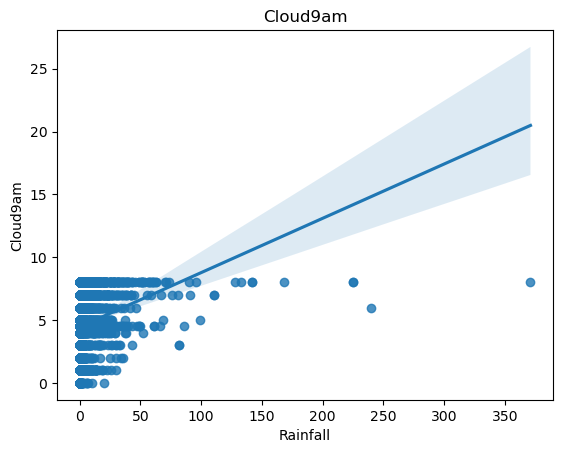

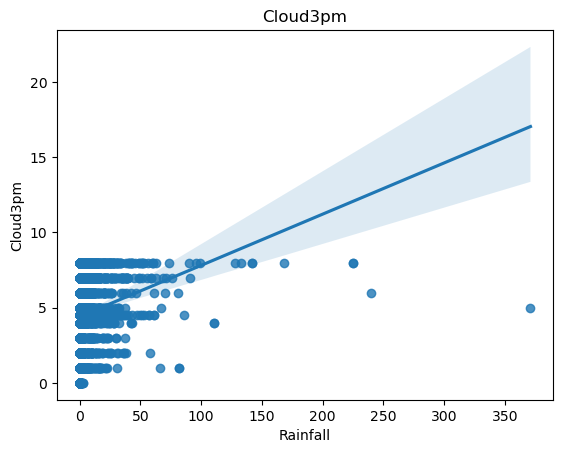

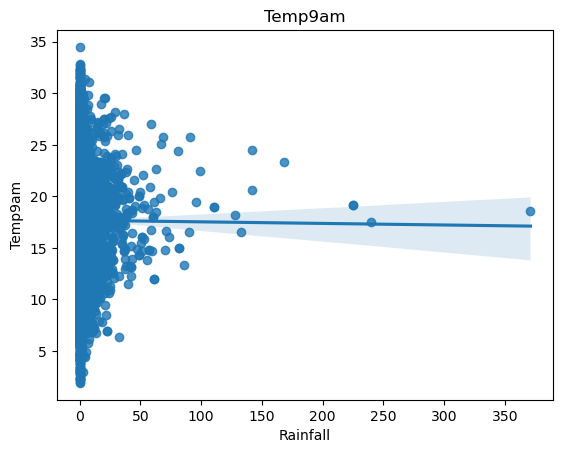

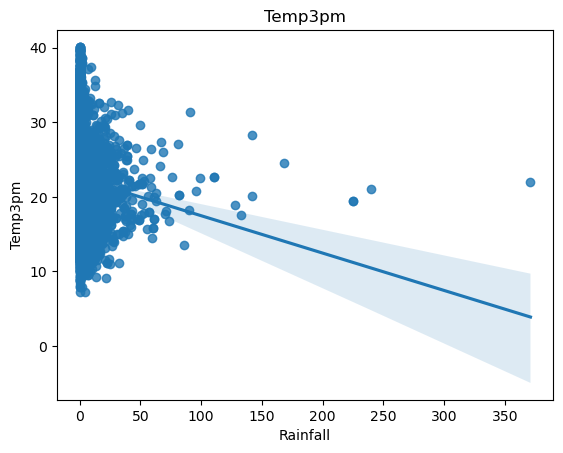

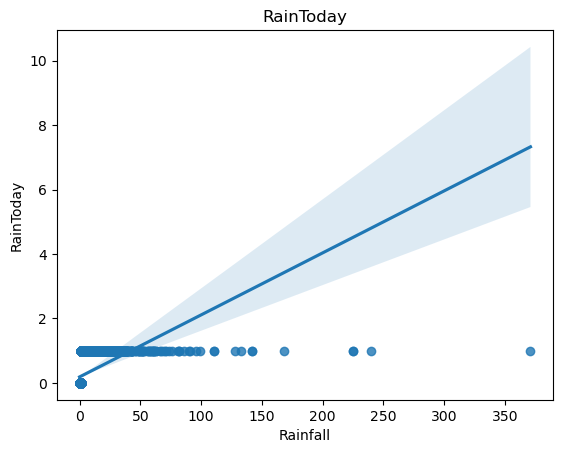

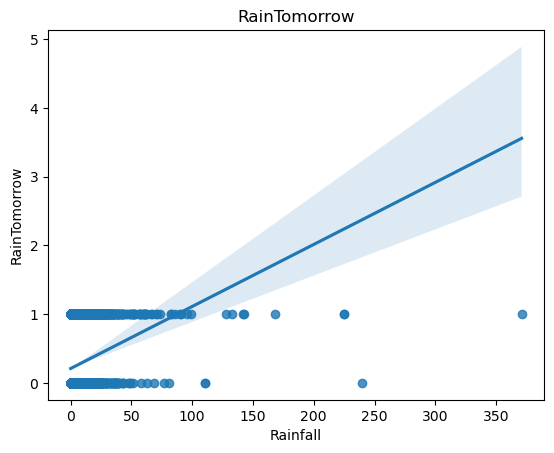

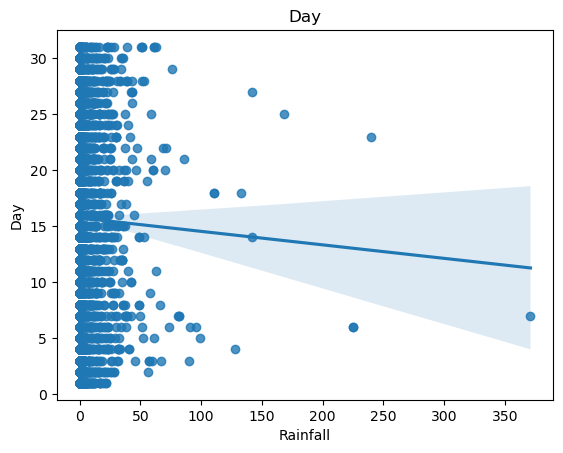

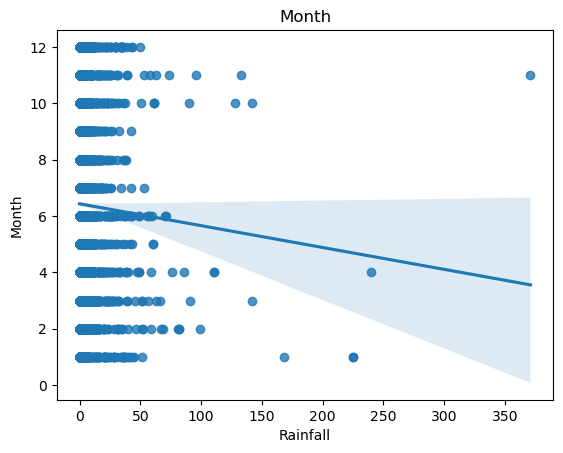

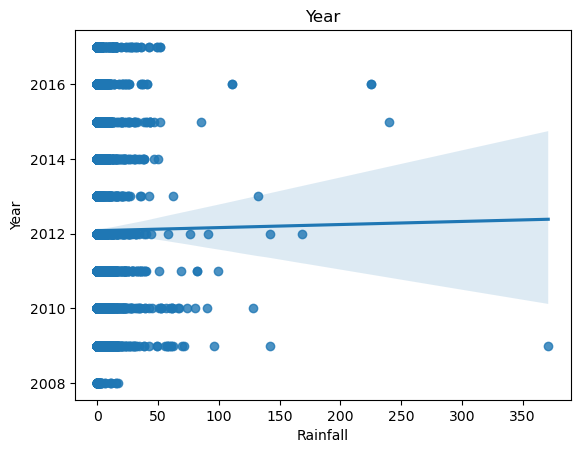

In [130]:
for i in dfr1.columns:
    sns.regplot(x = 'Rainfall', y = i, data = dfr1)
    plt.title(i)
    plt.show()

Separating the target variable & input variables.

In [131]:
xr = dfr1.drop('Rainfall', axis = 1)
yr = dfr1['Rainfall']

In [132]:
xr

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,5.389395,7.632205,13,44.000000,13,14,20.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,5.389395,7.632205,14,44.000000,6,15,4.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,5.389395,7.632205,15,46.000000,13,15,19.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,5.389395,7.632205,4,24.000000,9,0,11.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,5.389395,7.632205,13,41.000000,1,7,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,5.389395,7.632205,0,31.000000,9,1,13.0,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,5.389395,7.632205,6,22.000000,9,3,13.0,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,5.389395,7.632205,3,37.000000,9,14,9.0,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,5.389395,7.632205,9,28.000000,10,3,13.0,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [133]:
yr

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8095, dtype: float64

In [134]:
xr.skew()

Location        -0.035796
MinTemp         -0.094538
MaxTemp          0.321781
Evaporation      0.844939
Sunshine        -0.729992
WindGustDir      0.111452
WindGustSpeed    0.509079
WindDir9am       0.152240
WindDir3pm      -0.129575
WindSpeed9am     0.712369
WindSpeed3pm     0.301024
Humidity9am     -0.237214
Humidity3pm      0.125872
Pressure9am      0.024754
Pressure3pm      0.047523
Cloud9am        -0.364928
Cloud3pm        -0.273745
Temp9am         -0.038715
Temp3pm          0.341420
RainToday        1.232771
RainTomorrow     1.255370
Day              0.005967
Month            0.059034
Year             0.430854
dtype: float64

We will be using the power transformer on the input variables to remove skewness.

In [135]:
for i in xr.columns:
    xr[i] = pt.fit_transform(xr[i].values.reshape(-1,1))

In [136]:
yr = pt.fit_transform(yr.values.reshape(-1,1))

In [137]:
xr.skew()

Location        -0.182671
MinTemp         -0.105524
MaxTemp         -0.013901
Evaporation      0.076556
Sunshine        -0.078349
WindGustDir     -0.190368
WindGustSpeed    0.003452
WindDir9am      -0.162530
WindDir3pm      -0.250706
WindSpeed9am    -0.110975
WindSpeed3pm    -0.076856
Humidity9am     -0.066480
Humidity3pm     -0.036858
Pressure9am     -0.000119
Pressure3pm     -0.000466
Cloud9am        -0.282693
Cloud3pm        -0.220551
Temp9am         -0.054411
Temp3pm         -0.012651
RainToday        1.232771
RainTomorrow     1.255370
Day             -0.211950
Month           -0.148836
Year             0.000000
dtype: float64

As we have tried removing the skewness and now we will standardize the data using the standard scaler.

In [138]:
xr1 = pd.DataFrame(ss.fit_transform(xr), columns = xr.columns)

In [139]:
xr1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.569588,0.051776,-0.071958,0.184691,-0.084473,1.160126,0.429401,1.176356,1.355236,0.780227,...,-1.407547,1.448767,-0.012895,-0.136639,-0.022649,-0.558373,-0.553042,-1.888015,1.522391,-1.665811
1,-1.569588,-1.067227,0.292084,0.184691,-0.084473,1.320115,0.429401,-0.152690,1.560242,-0.986661,...,-1.286937,-0.027808,-0.012895,-0.082605,0.398054,-0.558373,-0.553042,-1.704615,1.522391,-1.665811
2,-1.569588,-0.041236,0.388195,0.184691,-0.084473,1.475919,0.574873,1.176356,1.560242,0.696200,...,-1.132181,-0.027808,-1.090922,0.600311,0.216066,-0.558373,-0.553042,-1.537485,1.522391,-1.665811
3,-1.569588,-0.730797,0.745250,0.184691,-0.084473,-0.581988,-1.262113,0.463419,-1.874864,-0.067238,...,-0.431613,-0.027808,-0.012895,0.079388,0.748705,-0.558373,-0.553042,-1.381497,1.522391,-1.665811
4,-1.569588,0.813209,1.370343,0.184691,-0.084473,1.160126,0.204835,-1.527033,-0.142838,-0.544875,...,-1.597508,1.011100,1.548216,0.025409,1.230792,-0.558373,-0.553042,-1.233849,1.522391,-1.665811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8090,1.016623,-1.931298,0.012463,0.184691,-0.084473,-1.839717,-0.610225,0.463419,-1.592479,0.142293,...,0.831378,-0.027808,-0.012895,-1.367314,0.080671,-0.558373,-0.553042,0.636067,-0.041667,1.996097
8091,1.016623,-1.780434,0.324265,0.184691,-0.084473,-0.126564,-1.465153,0.463419,-1.078467,0.142293,...,0.630891,-0.027808,-0.012895,-1.221851,0.430646,-0.558373,-0.553042,0.736579,-0.041667,1.996097
8092,1.016623,-1.442004,0.576657,0.184691,-0.084473,-0.836895,-0.107784,0.463419,1.355236,-0.294436,...,0.244937,-0.027808,-0.012895,-0.931527,0.686196,-0.558373,-0.553042,0.835905,-0.041667,1.996097
8093,1.016623,-0.992400,0.592144,0.184691,-0.084473,0.468496,-0.879623,0.651216,-1.078467,0.142293,...,0.194431,-0.671970,-1.090922,-0.461258,0.670485,-0.558373,-0.553042,0.934109,-0.041667,1.996097


Checking the VIF

In [140]:
vifr = pd.DataFrame()

vifr['Values'] = [var(xr1.values,i)for i in range (len(xr1.columns))]
vifr['Features'] = xr1.columns
vifr

,Values,Features
0,1.589637,Location
1,8.817710,MinTemp
2,26.706848,MaxTemp
3,1.540224,Evaporation
4,2.075016,Sunshine
5,1.613834,WindGustDir
6,2.288958,WindGustSpeed
7,1.348554,WindDir9am
8,1.483261,WindDir3pm
9,1.988332,WindSpeed9am


Highest VIF value can be seen in - Temp3pm, hence we will remove it.

In [141]:
xr1.drop('Temp3pm', axis = 1, inplace = True)

In [142]:
vifr1 = pd.DataFrame()

vifr1['Values'] = [var(xr1.values,i)for i in range (len(xr1.columns))]
vifr1['Features'] = xr1.columns
vifr1

,Values,Features
0,1.587247,Location
1,8.769596,MinTemp
2,9.886385,MaxTemp
3,1.540136,Evaporation
4,2.075014,Sunshine
5,1.611476,WindGustDir
6,2.271459,WindGustSpeed
7,1.348515,WindDir9am
8,1.480946,WindDir3pm
9,1.987234,WindSpeed9am


Highest VIF value can bee seen in - Pressure9am, hence we will remove it.

In [143]:
xr1.drop('Pressure9am', axis = 1, inplace = True)

In [144]:
vifr2 = pd.DataFrame()

vifr2['Values'] = [var(xr1.values,i)for i in range (len(xr1.columns))]
vifr2['Features'] = xr1.columns
vifr2

,Values,Features
0,1.587151,Location
1,8.650153,MinTemp
2,9.489535,MaxTemp
3,1.522031,Evaporation
4,2.065812,Sunshine
5,1.597400,WindGustDir
6,2.247077,WindGustSpeed
7,1.324359,WindDir9am
8,1.416152,WindDir3pm
9,1.983805,WindSpeed9am


A high VIF value can be seen in - Temp9am, but we will not remove the column as we have already removed 2 columns from our data set. We will go ahead with this.

Searching for Best Random State.

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [146]:
maxr2 = 0
rs = 0

for i in range(1,200):
    xx_train,xx_test,yy_train,yy_test = train_test_split(xr1,yr, test_size =  0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(xx_train,yy_train)
    pred = lr.predict(xx_test)
    r2 = r2_score(yy_test, pred)
    if r2 > maxr2:
        maxr2 = r2
        rs = i

print('The highest r2 score is', maxr2, 'at random state', rs)

The highest r2 score is 0.9078995323067903 at random state 45


In [147]:
xx_train,xx_test,yy_train,yy_test = train_test_split(xr1,yr, test_size = 0.30, random_state = 45)

In [148]:
lr.fit(xx_train, yy_train)
lrpred = lr.predict(xx_test)
lrr2 = r2_score(yy_test, lrpred)
lrmse = mean_squared_error(yy_test, lrpred)
lrmae = mean_absolute_error(yy_test, lrpred)

print(lrr2.round(2))
print(lrmse)
print(lrmae)

0.91
0.09710180300248258
0.20165795339524964


In [149]:
rfr = RandomForestRegressor()

rfr.fit(xx_train,yy_train)
rfrpred = rfr.predict(xx_test)
rfrr2 = r2_score(yy_test,rfrpred)
rfrmse = mean_squared_error(yy_test, rfrpred)
rfrmae = mean_absolute_error(yy_test, rfrpred)

print(rfrr2.round(2))
print(rfrmse)
print(rfrmae)

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\1992570159.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xx_train,yy_train)


0.93
0.07265326605756833
0.15864134253592704


In [152]:
gbr=GradientBoostingRegressor()

gbr.fit(xx_train,yy_train)
gbrpred = gbr.predict(xx_test)
gbrr2 = r2_score(yy_test,gbrpred)
gbrmse = mean_squared_error(yy_test, gbrpred)
gbrmae = mean_absolute_error(yy_test, gbrpred)

print(gbrr2.round(2))
print(gbrmse)
print(gbrmae)

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.91
0.09144318340872529
0.18964983476039893


In [155]:
etr = ExtraTreesRegressor()

etr.fit(xx_train,yy_train)
etrpred = etr.predict(xx_test)
etrr2 = r2_score(yy_test, etrpred)
etrmse = mean_squared_error(yy_test, etrpred)
etrmae = mean_absolute_error(yy_test, etrpred)

print(etrr2.round(2))
print(etrmse)
print(etrmae)

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_20004\192164766.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(xx_train,yy_train)


0.94
0.0679386182476188
0.1373288553901376


In [156]:
la = Lasso()

la.fit(xx_train,yy_train)
lapred = la.predict(xx_test)
lar2 = r2_score(yy_test, lapred)
lamse = mean_squared_error(yy_test, lapred)
lamae = mean_absolute_error(yy_test, lapred)

print(lar2.round(2))
print(lamse)
print(lamae)

-0.0
1.0583198267111
0.8900044120597725


In [157]:
ri = Ridge()

ri.fit(xx_train,yy_train)
ripred = ri.predict(xx_test)
rir2 = r2_score(yy_test, ripred)
rimse = mean_squared_error(yy_test,ripred)
rimae = mean_absolute_error(yy_test, ripred)

print(rir2.round(2))
print(rimse)
print(rimae)

0.91
0.09710393056340721
0.20171258065699146


The r2_Score for the all the models is as follows:

In [158]:
print('The R2 Score for Linear Regression', lrr2.round(2))
print('The R2 Score for Random Forest', rfrr2.round(2))
print('The R2 Score for Gradient Boost', gbrr2.round(2))
print('The R2 Score for Extra Trees', etrr2.round(2))
print('The R2 Score for Lasso', lar2.round(2))
print('The R2 Score for Ridge', rir2.round(2))

The R2 Score for Linear Regression 0.91
The R2 Score for Random Forest 0.93
The R2 Score for Gradient Boost 0.91
The R2 Score for Extra Trees 0.94
The R2 Score for Lasso -0.0
The R2 Score for Ridge 0.91


The Extra Trees Regressor is having the Highest R2 Score with 94%.

We will be checking the cross val score for all the models.

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
print('Cross Val Score for Linear Regression', cvs(lr,xr1,yr).mean())

print('Cross Val Score for Random Forest', cvs(rfr,xr1,yr).mean())

print('Cross Val Score for Gradient Boost', cvs(gbr,xr1,yr).mean())

print('Cross Val Score for Extra Trees', cvs(etr,xr1,yr).mean())

print('Cross Val Score for Lasso', cvs(la,xr1,yr).mean())

print('Cross Val Score for Ridge', cvs(ri,xr1,yr).mean())

Cross Val Score for Linear Regression 0.8920722334894033
Cross Val Score for Random Forest 0.9064255693753317
Cross Val Score for Gradient Boost 0.8958361626513298
Cross Val Score for Extra Trees 0.9129363949340796
Cross Val Score for Lasso -0.01161675256683492
Cross Val Score for Ridge 0.8920712342515991


So cross val score is almost same for the models hence Extra Trees Regressor will be considered as the best model and we will go forward and to hyper parameter tunning.

In [162]:
pram = {'n_estimators': [100, 200, 300],  
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [ 10, 20, 30]}

In [164]:
pram

{'n_estimators': [100, 200, 300],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30]}

In [165]:
gcv1 = GridSearchCV(ExtraTreesRegressor(), pram, cv =5)

In [166]:
gcv1.fit(xx_train,yy_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [167]:
gcv1.best_params_

{'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200}

In [169]:
m1 = ExtraTreesRegressor( max_depth = 30, max_features = 'auto', n_estimators = 200)

In [171]:
m1.fit(xx_train,yy_train)
m1pred = m1.predict(xx_test)
m1r2 = r2_score(yy_test, m1pred)
m1mse = mean_squared_error(yy_test, m1pred)
m1mae = mean_absolute_error(yy_test, m1pred)

print(m1r2.round(2))
print(m1mse)
print(m1mae)

0.94
0.06761667777946505
0.13744796173960522


Hyper parameter tunning for the best model has been done. We will save our best model.

In [172]:
joblib.dump(m1, 'RainFall Prediction')

['RainFall Prediction']

In [173]:
mod = joblib.load('RainFall Prediction')

In [174]:
rpred = mod.predict(xx_test)

In [175]:
O = np.array(yy_test)

In [176]:
rdf = pd.DataFrame()

rdf['Predicted'] = rpred
rdf['Original'] = O

rdf

,Predicted,Original
0,1.638915,1.702296
1,-0.504152,-0.662721
2,-0.566123,-0.662721
3,1.579581,1.579581
4,-0.566093,-0.662721
...,...,...
2424,1.741136,1.741136
2425,-0.662721,-0.662721
2426,1.690040,1.690040
2427,-0.662721,-0.662721


## Conclusion - 

## 1) Classification - Rain prediction Yes - No - has accuracy score of - 94%.

## 2) Regression - Amount of Rainfall prediction - has R2 score of - 94%.